In [98]:
using Revise
using Underscore
using Particles, Experiments
using Distributions, ConjugatePriors, DataFrames, DataFramesMeta, JLD2
using Gadfly

using Colors
ngray(start, finish) = n -> linspace(Gray(start), Gray(finish), n)

Revise.track("VOTs.jl")

# @load "results/run2-2018-01-30T10:05:12.518.jld2" exs results
@load "results/run1_gibbs_2018-01-30T12:18:31.076.jld2" gibbs_exs gibbs_res
@load "results/run4-2018-07-15T23:06:09.221.jld2" exs results

2-element Array{Symbol,1}:
 :exs    
 :results

In [167]:
drawpng600(p, wh...) = draw(PNG(wh..., dpi=600), p)

drawpng600 (generic function with 1 method)

In [120]:
er_to_dict(expt, res_with_entropy) = 
    merge(Dict(expt, first(res_with_entropy)), Dict(:entropy_bits=>last(res_with_entropy)./log(2)))

run4_ex_res = @_ zip(exs, results) |>
    mapreduce(append!, Dict{Symbol,Any}[], _) do er
        e, r = er
        map(Dict ∘ er_to_dict, flatten.(e, :num_obs), r)
    end |> 
    dictofarrays |> 
    DataFrame 

4800×15 DataFrames.DataFrame. Omitted printing of 11 columns
│ Row  │ K_map │ K_mean  │ K_modal │ data                                    │
├──────┼───────┼─────────┼─────────┼─────────────────────────────────────────┤
│ 1    │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 2    │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 3    │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4    │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 5    │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 6    │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 7    │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 8    │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 9    │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 10   │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 11   │ 1     │ 1.0     │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
⋮
│ 4789 │ 1     │ 1.54219 │ 1       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4790 │ 2     │ 2.90086 │ 2       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4791 │ 2     │ 2.84623 │ 2       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4792 │ 2     │ 2.98114 │ 2       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4793 │ 2     │ 3.13777 │ 3       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4794 │ 2     │ 3.64625 │ 3       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4795 │ 3     │ 4.25526 │ 4       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4796 │ 5     │ 8.87409 │ 9       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4797 │ 5     │ 9.14408 │ 8       │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4798 │ 9     │ 12.2146 │ 13      │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4799 │ 13    │ 13.23   │ 14      │ JLD2.ReconstructedTypes.####15#16#958() │
│ 4800 │ 9     │ 17.1926 │ 17      │ JLD2.ReconstructedTypes.####15#16#958() │

In [154]:
function label_minimum_with(x, lab)
    minx = minimum(x)
    ifelse.(x .== minx, "$lab$minx", string.(x))
end

run4_summary = @_ run4_ex_res |>
    by(_, [:num_particle, :num_obs, :α]) do d
        DataFrame(low = mean(d[:K_map] .< 2),
                  success = mean(d[:K_map] .== 2),
                  high = mean(d[:K_map] .> 2),
                  avg_K_map = mean(d[:K_map]),
                  avg_K_mean = mean(d[:K_mean]),
                  avg_p_K2 = mean(get.(d[:p_of_K], 2, 0)),
                  avg_entropy_bits = mean(d[:entropy_bits]))
    end |>
    @transform(_, α_str = label_minimum_with(:α, "α = "))# ifelse.(:α .== minimum(:α), "α = $(minimum(:α))", string.(:α)))

96×11 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row │ num_particle │ num_obs │ α    │ low  │ success │ high │ avg_K_map │
├─────┼──────────────┼─────────┼──────┼──────┼─────────┼──────┼───────────┤
│ 1   │ 1            │ 10      │ 0.01 │ 0.94 │ 0.06    │ 0.0  │ 1.06      │
│ 2   │ 1            │ 50      │ 0.01 │ 0.94 │ 0.06    │ 0.0  │ 1.06      │
│ 3   │ 1            │ 100     │ 0.01 │ 0.94 │ 0.06    │ 0.0  │ 1.06      │
│ 4   │ 1            │ 500     │ 0.01 │ 0.92 │ 0.08    │ 0.0  │ 1.08      │
│ 5   │ 1            │ 1000    │ 0.01 │ 0.92 │ 0.08    │ 0.0  │ 1.08      │
│ 6   │ 1            │ 5000    │ 0.01 │ 0.92 │ 0.08    │ 0.0  │ 1.08      │
│ 7   │ 1            │ 10      │ 0.1  │ 0.86 │ 0.1     │ 0.04 │ 1.18      │
│ 8   │ 1            │ 50      │ 0.1  │ 0.8  │ 0.16    │ 0.04 │ 1.24      │
│ 9   │ 1            │ 100     │ 0.1  │ 0.78 │ 0.16    │ 0.06 │ 1.28      │
│ 10  │ 1            │ 500     │ 0.1  │ 0.78 │ 0.16    │ 0.06 │ 1.28      │
│ 11  │ 1            │ 1000    │ 0.1  │ 0.78 │ 0.16    │ 0.06 │ 1.28      │
⋮
│ 85  │ 1000         │ 10      │ 1.0  │ 0.82 │ 0.18    │ 0.0  │ 1.18      │
│ 86  │ 1000         │ 50      │ 1.0  │ 0.3  │ 0.7     │ 0.0  │ 1.7       │
│ 87  │ 1000         │ 100     │ 1.0  │ 0.04 │ 0.9     │ 0.06 │ 2.02      │
│ 88  │ 1000         │ 500     │ 1.0  │ 0.0  │ 0.66    │ 0.34 │ 2.38      │
│ 89  │ 1000         │ 1000    │ 1.0  │ 0.0  │ 0.56    │ 0.44 │ 2.5       │
│ 90  │ 1000         │ 5000    │ 1.0  │ 0.0  │ 0.22    │ 0.78 │ 3.04      │
│ 91  │ 1000         │ 10      │ 10.0 │ 0.14 │ 0.1     │ 0.76 │ 3.58      │
│ 92  │ 1000         │ 50      │ 10.0 │ 0.0  │ 0.1     │ 0.9  │ 4.02      │
│ 93  │ 1000         │ 100     │ 10.0 │ 0.0  │ 0.04    │ 0.96 │ 5.22      │
│ 94  │ 1000         │ 500     │ 10.0 │ 0.0  │ 0.0     │ 1.0  │ 9.66      │
│ 95  │ 1000         │ 1000    │ 10.0 │ 0.0  │ 0.0     │ 1.0  │ 11.34     │
│ 96  │ 1000         │ 5000    │ 10.0 │ 0.0  │ 0.0     │ 1.0  │ 17.0      │

In [115]:
entropy([0.5, 0.5]) ./ log(2)

1.0

In [126]:
entropy([0.5, 0.25, 0.25]) ./ log(2)

1.5

In [110]:
gibbs_summary = @_ zip(gibbs_exs, gibbs_res) |>
    results_summary |>
    @where(_, :num_obs .== 1000, :num_particle .== 1000) |>
    @transform(_, α_str = ifelse.(:α .== 0.01, "α = 0.01", string.(:α)))

4×10 DataFrames.DataFrame. Omitted printing of 3 columns
│ Row │ num_particle │ num_obs │ α    │ low │ success │ high │ avg_K_map │
├─────┼──────────────┼─────────┼──────┼─────┼─────────┼──────┼───────────┤
│ 1   │ 1000         │ 1000    │ 0.01 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 2   │ 1000         │ 1000    │ 0.1  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 3   │ 1000         │ 1000    │ 1.0  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 4   │ 1000         │ 1000    │ 10.0 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │

In [13]:
component_pdfs(mm::MixtureModel) = [x->w*pdf(d, x) for (w,d) in zip(mm.prior.p, components(mm))]

component_pdfs (generic function with 1 method)

# Question

How do you know how many phonemes your language has?

Get un-labeled acoustic cues

Need to do **distributional learning**

# Prior work

## Computational level ("Bayesian" models)

Assign probability to _every possible number and set of clusters_

### Pros

* principled (based in optimal statistical inference): inductive biases are _prior_ on clusterings.
* flexible: extend naturally to hierarchical model (learn features, or lexical items

### Cons

* Not psyhchologically plausible: unconstrained by time/memory/processing
* Often **batch** inference (need all data at once)

## Algorithmic level ("cognitive" models)

Process models: specify representations and algorithms to operate on them.

McMurray, Aslin, Toscano (2009): "mixture of Gaussians", winner-take-all update

### Pros

* Model fitting is the cognitive process
* Include resource limitations

### Cons

* (often) un-principled
* (often) do not compose

# Bounded rationality

Computational-level models + **cognitively plausible** approximate inference algorithms

## Distributional learning

Infer _cluster assignments_ $z$ for data points $x$

## Sequential Monte Carlo (particle filter)

Finite number of **particles**

Each particle is **one hypothesis** about how data points are clustered (analogous to one sample in MCMC)

Particles updated **online, in parallel** as each data point comes in by **sampling** a new cluster assignment

## Prior $p(z_1\ldots z_N)$

**Start simple** and add complexity as needed

Dirichlet/Chinese Restaurant Process: probability of cluster proportional to **number of points already in it**.

Probability of **new cluster** proportional to concentration parameter $\alpha$

## Likelihood $p(x_1\ldots x_N | z_1 \ldots z_N)$

Only depends on other data points assigned to same cluster:

$$p(x_n | z_n, z_{1\ldots n-1}, x_{1\ldots n-1}) = p(x_n | \{ x_i \ \mathrm{if}\ z_i = z_n\})$$

Conjugate prior on cluster mean/variance, prefer compact clusters.

Only need to track **sufficient statistics** (mean, variance, and count of data in each cluster).

# English VOT

Based on McMurray, Aslin, Toscano (2009)

In [30]:
# plot real dist and idealized dist/samples

bp_vots = @where(VOTs.vot, :place .== "lab")

@by(bp_vots, :phoneme, n=length(:vot))

2×2 DataFrames.DataFrame
│ Row │ phoneme │ n    │
├─────┼─────────┼──────┤
│ 1   │ p       │ 1277 │
│ 2   │ b       │ 1174 │

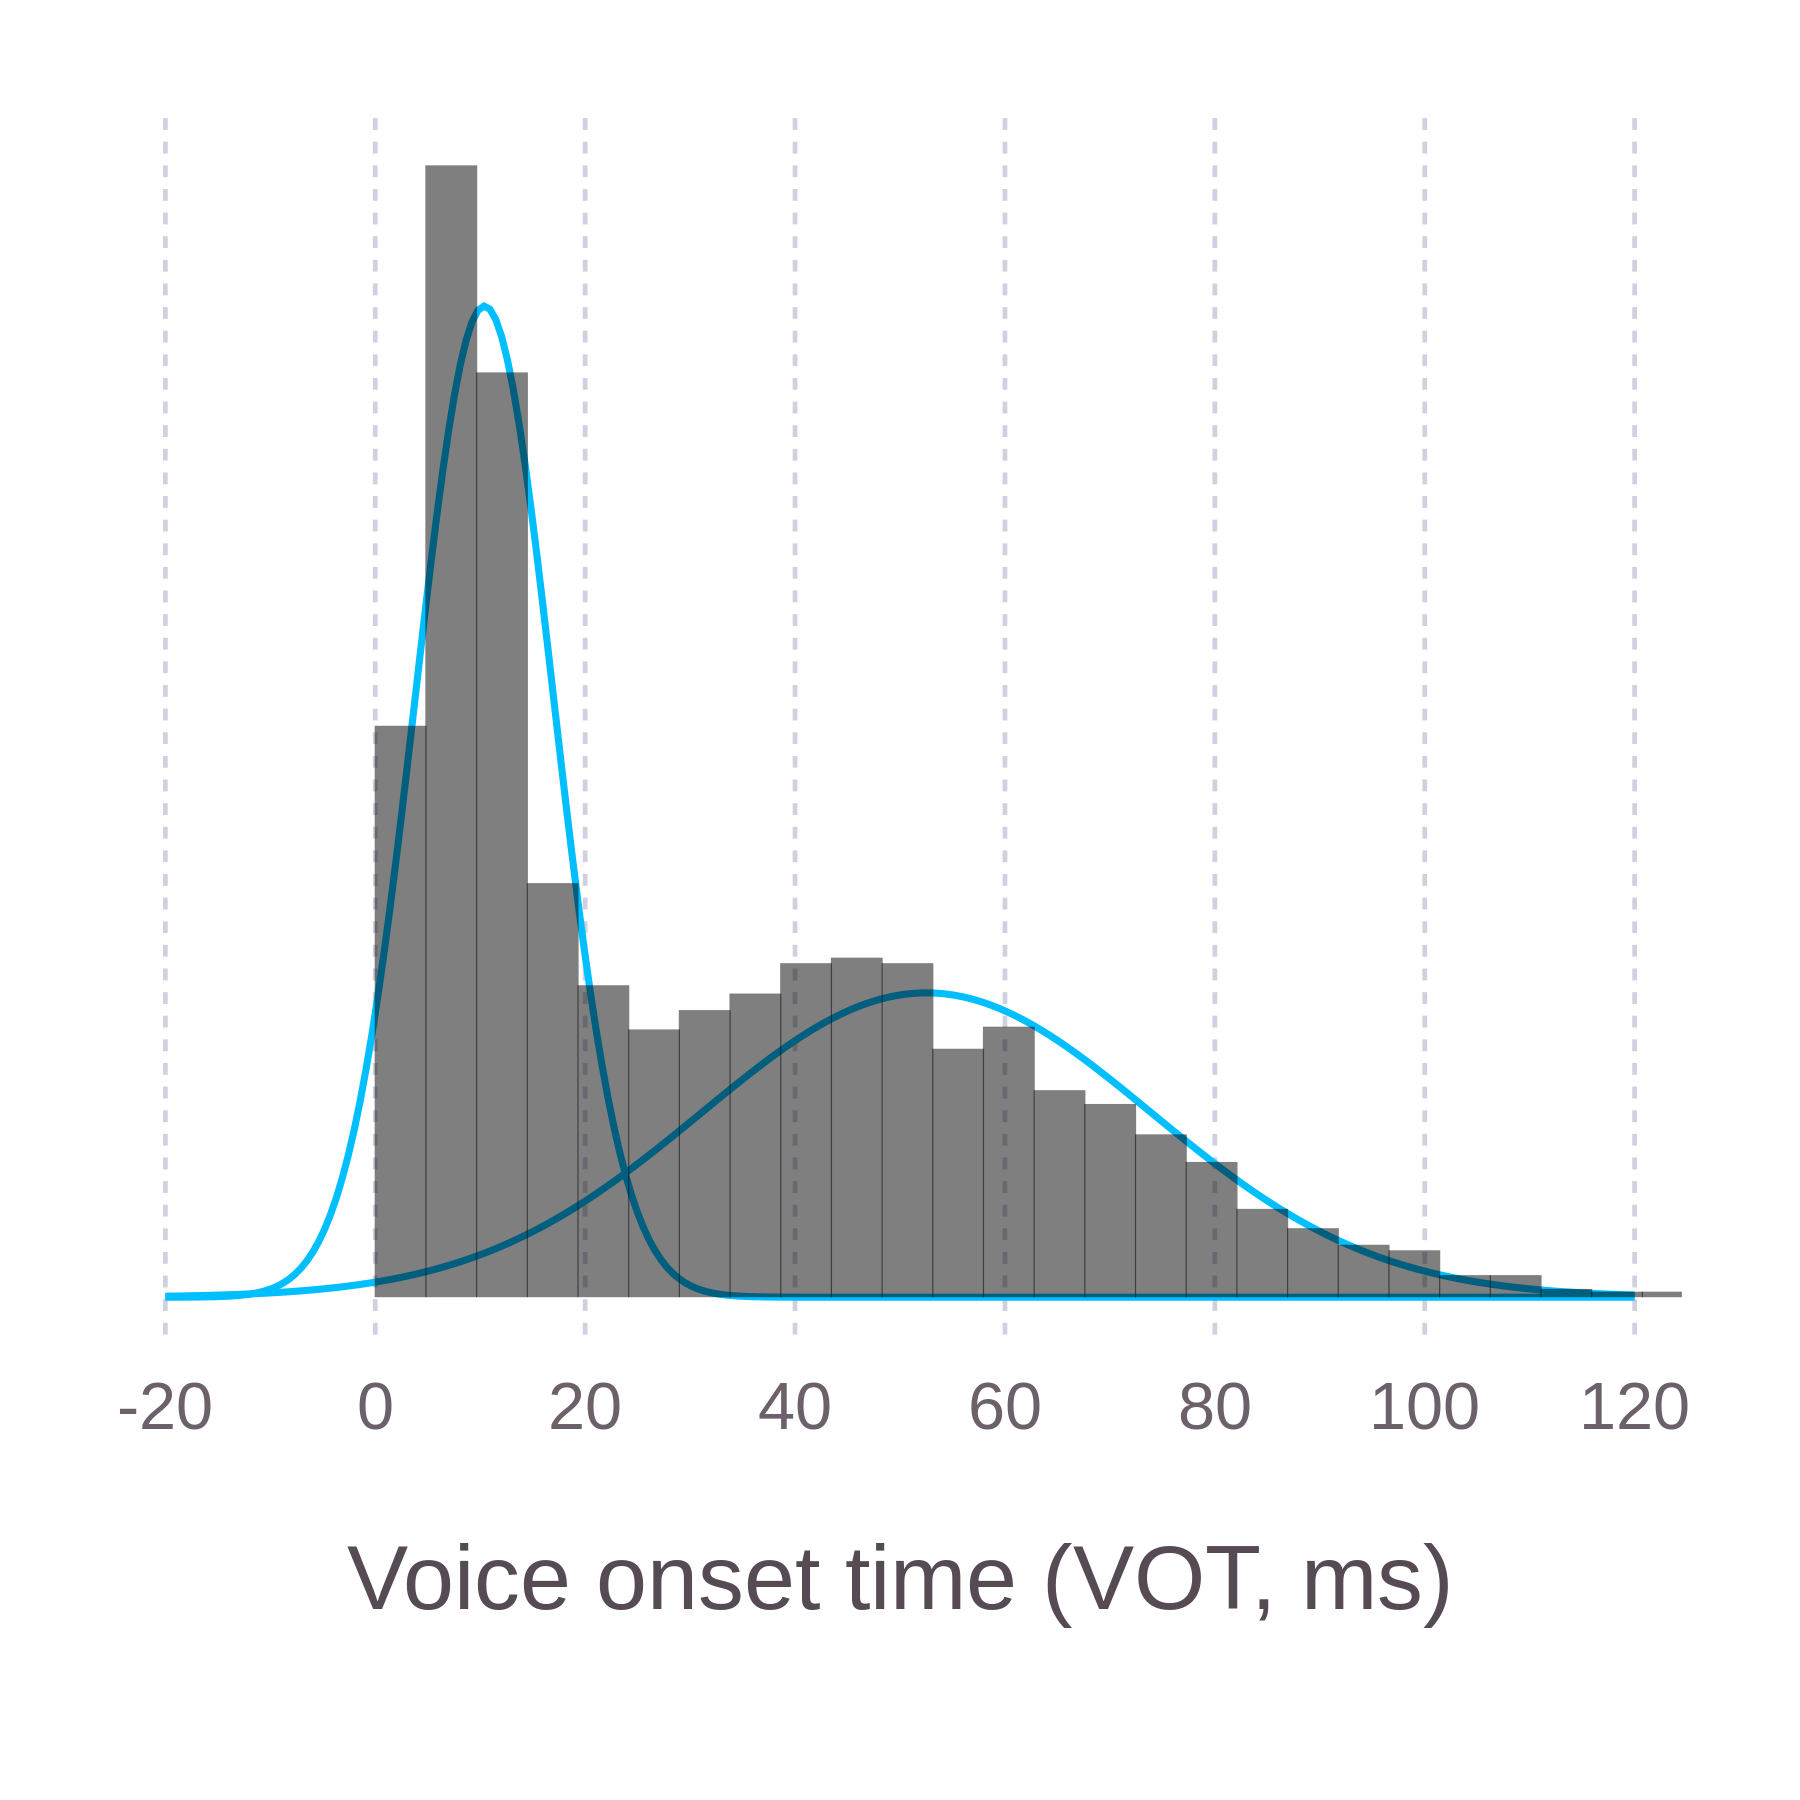

false

In [182]:
@_ plot(layer(bp_vots, x=:vot, Geom.histogram(density=true, bincount=30), Theme(default_color=GrayA(0.,0.5))),
     layer.(component_pdfs(VOTs.bp_mix), -20, 120)..., 
     Coord.cartesian(xmin=-20, xmax=120),
     Guide.xlabel("Voice onset time (VOT, ms)"),
     Guide.YLabel(""),
     Guide.YTicks(ticks=nothing)) |>
    drawpng600(_, 3inch, 3inch)

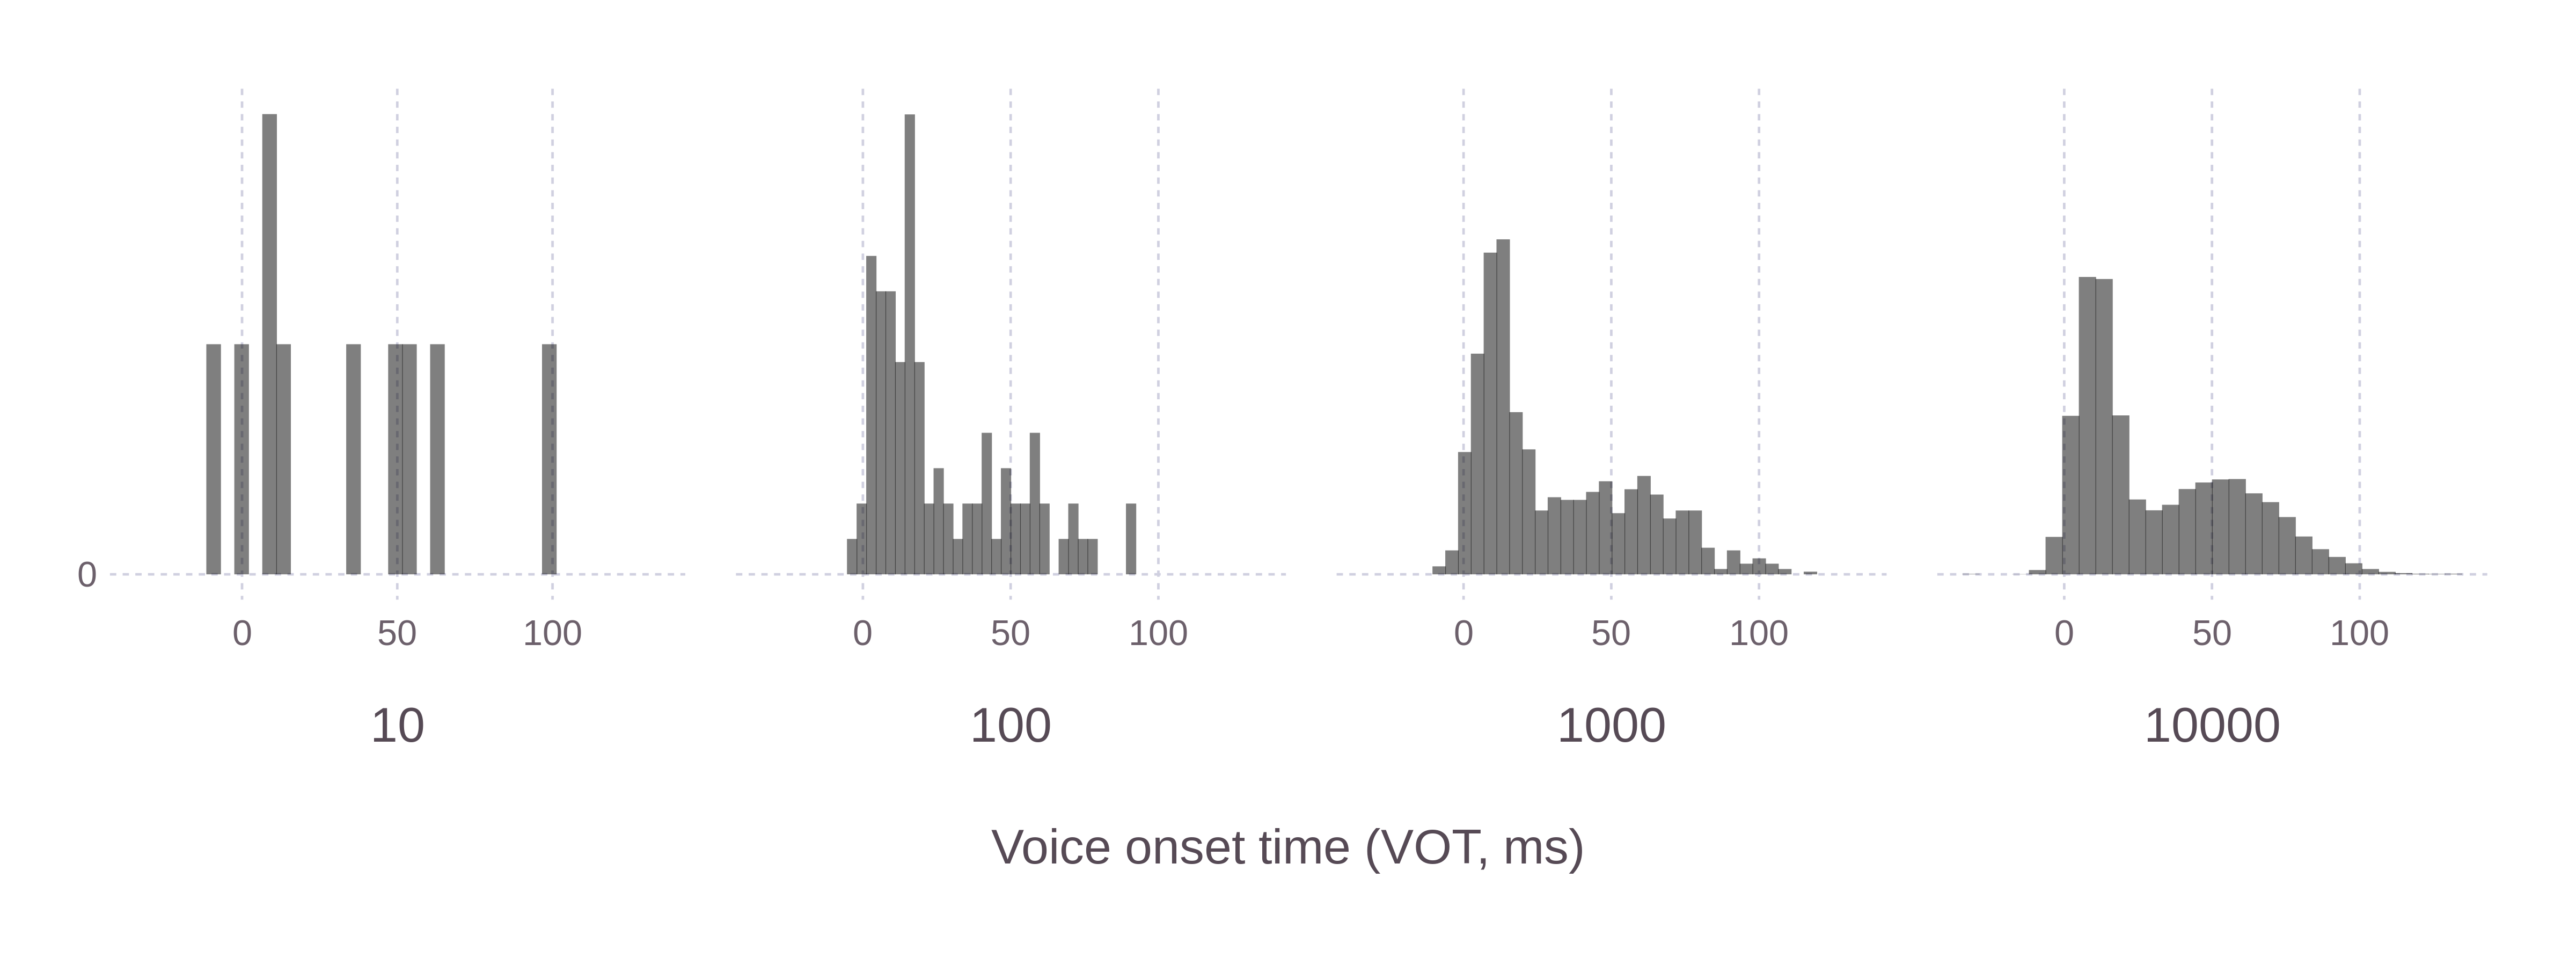

false

In [177]:
srand(1986)
vot_demo = DataFrame(vot = rand(VOTs.bp_mix, 10000),
                     n = append!([10], round.(Int, exp10.(ceil.(log10.(2:10000))))))

@_ plot(layer(vot_demo, x=:vot, xgroup=:n, 
              Geom.subplot_grid(Geom.histogram(density=true, bincount=30),
                                Coord.cartesian(xmin=-20, xmax=120),
                                Guide.xticks(ticks=[0, 50, 100]),
                                Guide.yticks(ticks=[0]))),
     # Scale.color_discrete(ngray(0.8, 0.0), levels=[10, 100, 1_000, 10_000]),
     Guide.xlabel("Voice onset time (VOT, ms)"),
     Guide.ylabel(""),
     Theme(default_color=AGray(0., 0.5))) |>
     drawpng600(_, 8inch, 3inch)

# Learned clusters

In [224]:
# show clusters for various alphas and Ks
# alpha = 1., K=1, 10, 100

params = Dict(:μ_0 => mean(VOTs.bp_mix),
              :σ2_0 => var(VOTs.bp_mix),
              :κ_0 => 0.05,
              :ν_0 => 2.0,
              :num_particle => [1, 10, 100],
              :α => [0.1, 1., 10.],
              :num_obs => [[1000]],
              :data => [rand(VOTs.bp_mix, 1000)]
              )

ex_demo = experiments(params)

3×3×1×1 Array{Experiments.Experiment,4}:
[:, :, 1, 1] =
 Experiments.Experiment(Dict{Symbol,Any}(Pair{Symbol,Any}(:α, 0.1),Pair{Symbol,Any}(:num_particle, 1),Pair{Symbol,Any}(:num_obs, [1000]),Pair{Symbol,Any}(:κ_0, 0.05),Pair{Symbol,Any}(:μ_0, 31.4579),Pair{Symbol,Any}(:σ2_0, 694.493),Pair{Symbol,Any}(:data, [48.1544, 12.823, 96.3223, 4.78743, 59.1393, 13.5028, 14.4691, 36.0573, 69.8007, 56.0177  …  54.7448, 12.2971, 15.8736, 24.6239, 61.8015, 41.9833, 8.30223, 14.9085, 0.844726, 11.5613]),Pair{Symbol,Any}(:ν_0, 2.0)), 0xfe008ff7b582a9f0)   …  Experiments.Experiment(Dict{Symbol,Any}(Pair{Symbol,Any}(:α, 0.1),Pair{Symbol,Any}(:num_particle, 100),Pair{Symbol,Any}(:num_obs, [1000]),Pair{Symbol,Any}(:κ_0, 0.05),Pair{Symbol,Any}(:μ_0, 31.4579),Pair{Symbol,Any}(:σ2_0, 694.493),Pair{Symbol,Any}(:data, [48.1544, 12.823, 96.3223, 4.78743, 59.1393, 13.5028, 14.4691, 36.0573, 69.8007, 56.0177  …  54.7448, 12.2971, 15.8736, 24.6239, 61.8015, 41.9833, 8.30223, 14.9085, 0.844726, 11.5613]),Pair{Sym

In [226]:
res_demo = first.(run.(ex_demo, ps->copy(ps.particles)))

α=>0.1, num_particle=>1, num_obs=>[1000], κ_0=>0.05, μ_0=>31.45791749329243, σ2_0=>694.4932540666491, data=>[48.1544, 12.823, 96.3223, 4.78743, 59.1393, 13.5028, 14.4691, 36.0573, 69.8007, 56.0177, 4.28855, 41.5831, -2.75792, 7.70546, 37.3257, 34.2546, 50.6691, 72.057, 5.19152, 16.3712, 41.4693, 21.2713, 30.553, 12.844, 10.8835, 5.55729, 30.1081, 13.8487, 66.1584, 13.5385, 111.412, 6.80033, 8.14944, 2.16395, 62.7371, 50.1729, 21.328, 71.2991, 15.7413, 1.89317, 60.3951, 7.73363, 38.9218, 11.8892, -1.56435, 46.5582, 37.8366, 19.4491, 6.50983, 77.3425, 71.109, 13.9718, 64.4624, 53.4003, 8.32982, 12.7484, 9.39563, -1.00587, 13.0728, 51.3276, 79.4948, 2.875, 4.66231, 18.2359, 8.96974, 18.1876, 84.2116, 85.5049, 36.3938, 6.7319, 12.43, 2.83293, 19.1673, 8.46508, 7.38557, 46.4345, 28.0446, 5.60812, 41.1414, 1.21803, 47.1114, 38.95, 81.7611, 4.94365, 51.7468, 32.6432, 44.393, 54.9622, 9.82005, 1.17352, 19.2052, 53.2554, 35.9493, 46.2005, 55.6346, 7.23591, 68.9822, 12.4534, 7.25101, 6.0466, -4.

3×3×1×1 Array{Array{Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess},1},4}:
[:, :, 1, 1] =
 Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess}[2+ Particle]   …  Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess}[2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 3+ Particle  …  2+ Particle, 3+ Particle, 3+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle]                    
 Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess}[2+ Particle]      Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particle

α=>10.0, num_particle=>100, num_obs=>[1000], κ_0=>0.05, μ_0=>31.45791749329243, σ2_0=>694.4932540666491, data=>[48.1544, 12.823, 96.3223, 4.78743, 59.1393, 13.5028, 14.4691, 36.0573, 69.8007, 56.0177, 4.28855, 41.5831, -2.75792, 7.70546, 37.3257, 34.2546, 50.6691, 72.057, 5.19152, 16.3712, 41.4693, 21.2713, 30.553, 12.844, 10.8835, 5.55729, 30.1081, 13.8487, 66.1584, 13.5385, 111.412, 6.80033, 8.14944, 2.16395, 62.7371, 50.1729, 21.328, 71.2991, 15.7413, 1.89317, 60.3951, 7.73363, 38.9218, 11.8892, -1.56435, 46.5582, 37.8366, 19.4491, 6.50983, 77.3425, 71.109, 13.9718, 64.4624, 53.4003, 8.32982, 12.7484, 9.39563, -1.00587, 13.0728, 51.3276, 79.4948, 2.875, 4.66231, 18.2359, 8.96974, 18.1876, 84.2116, 85.5049, 36.3938, 6.7319, 12.43, 2.83293, 19.1673, 8.46508, 7.38557, 46.4345, 28.0446, 5.60812, 41.1414, 1.21803, 47.1114, 38.95, 81.7611, 4.94365, 51.7468, 32.6432, 44.393, 54.9622, 9.82005, 1.17352, 19.2052, 53.2554, 35.9493, 46.2005, 55.6346, 7.23591, 68.9822, 12.4534, 7.25101, 6.0466, 

In [254]:
component_labels(n::Int) = (strs = string.(1:n-1); push!(strs, "prior"))

component_labels (generic function with 1 method)

In [282]:
drop_last(x) = x[1:end-1]

drop_last (generic function with 1 method)

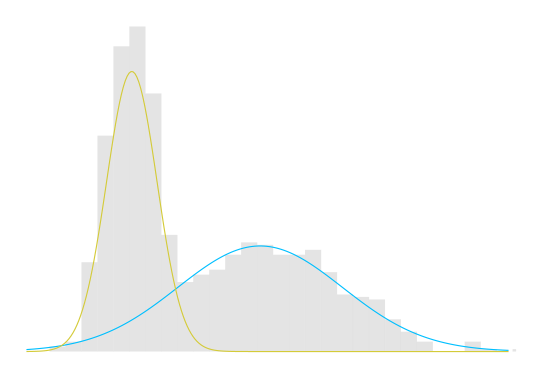

In [325]:
using Compose
function plot_demo(ex, res) 
    plot(layer.(drop_last.(component_pdfs.(posterior_predictive.(res))), -20, 120)...,
         layer(x=ex.params[:data][1:ex.params[:num_obs][]], 
               Geom.histogram(density=true, bincount=30), 
               Theme(default_color=RGBA(0.8, 0.8, 0.8, 0.5))),
         Coord.cartesian(xmin=-20, xmax=120),
         Theme(key_position=:none),
#          Guide.colorkey(title="Cluste]r", 
#                         #labels=component_labels(maximum(ncomponents.(res))+1),
#                         pos=[0.7w, -0.3h]),
         Guide.ylabel(""), 
         Guide.yticks(ticks=nothing),
         Guide.xlabel(""),
         Guide.xticks(ticks=nothing))
end

plot_demo(ex_demo[2], res_demo[2])

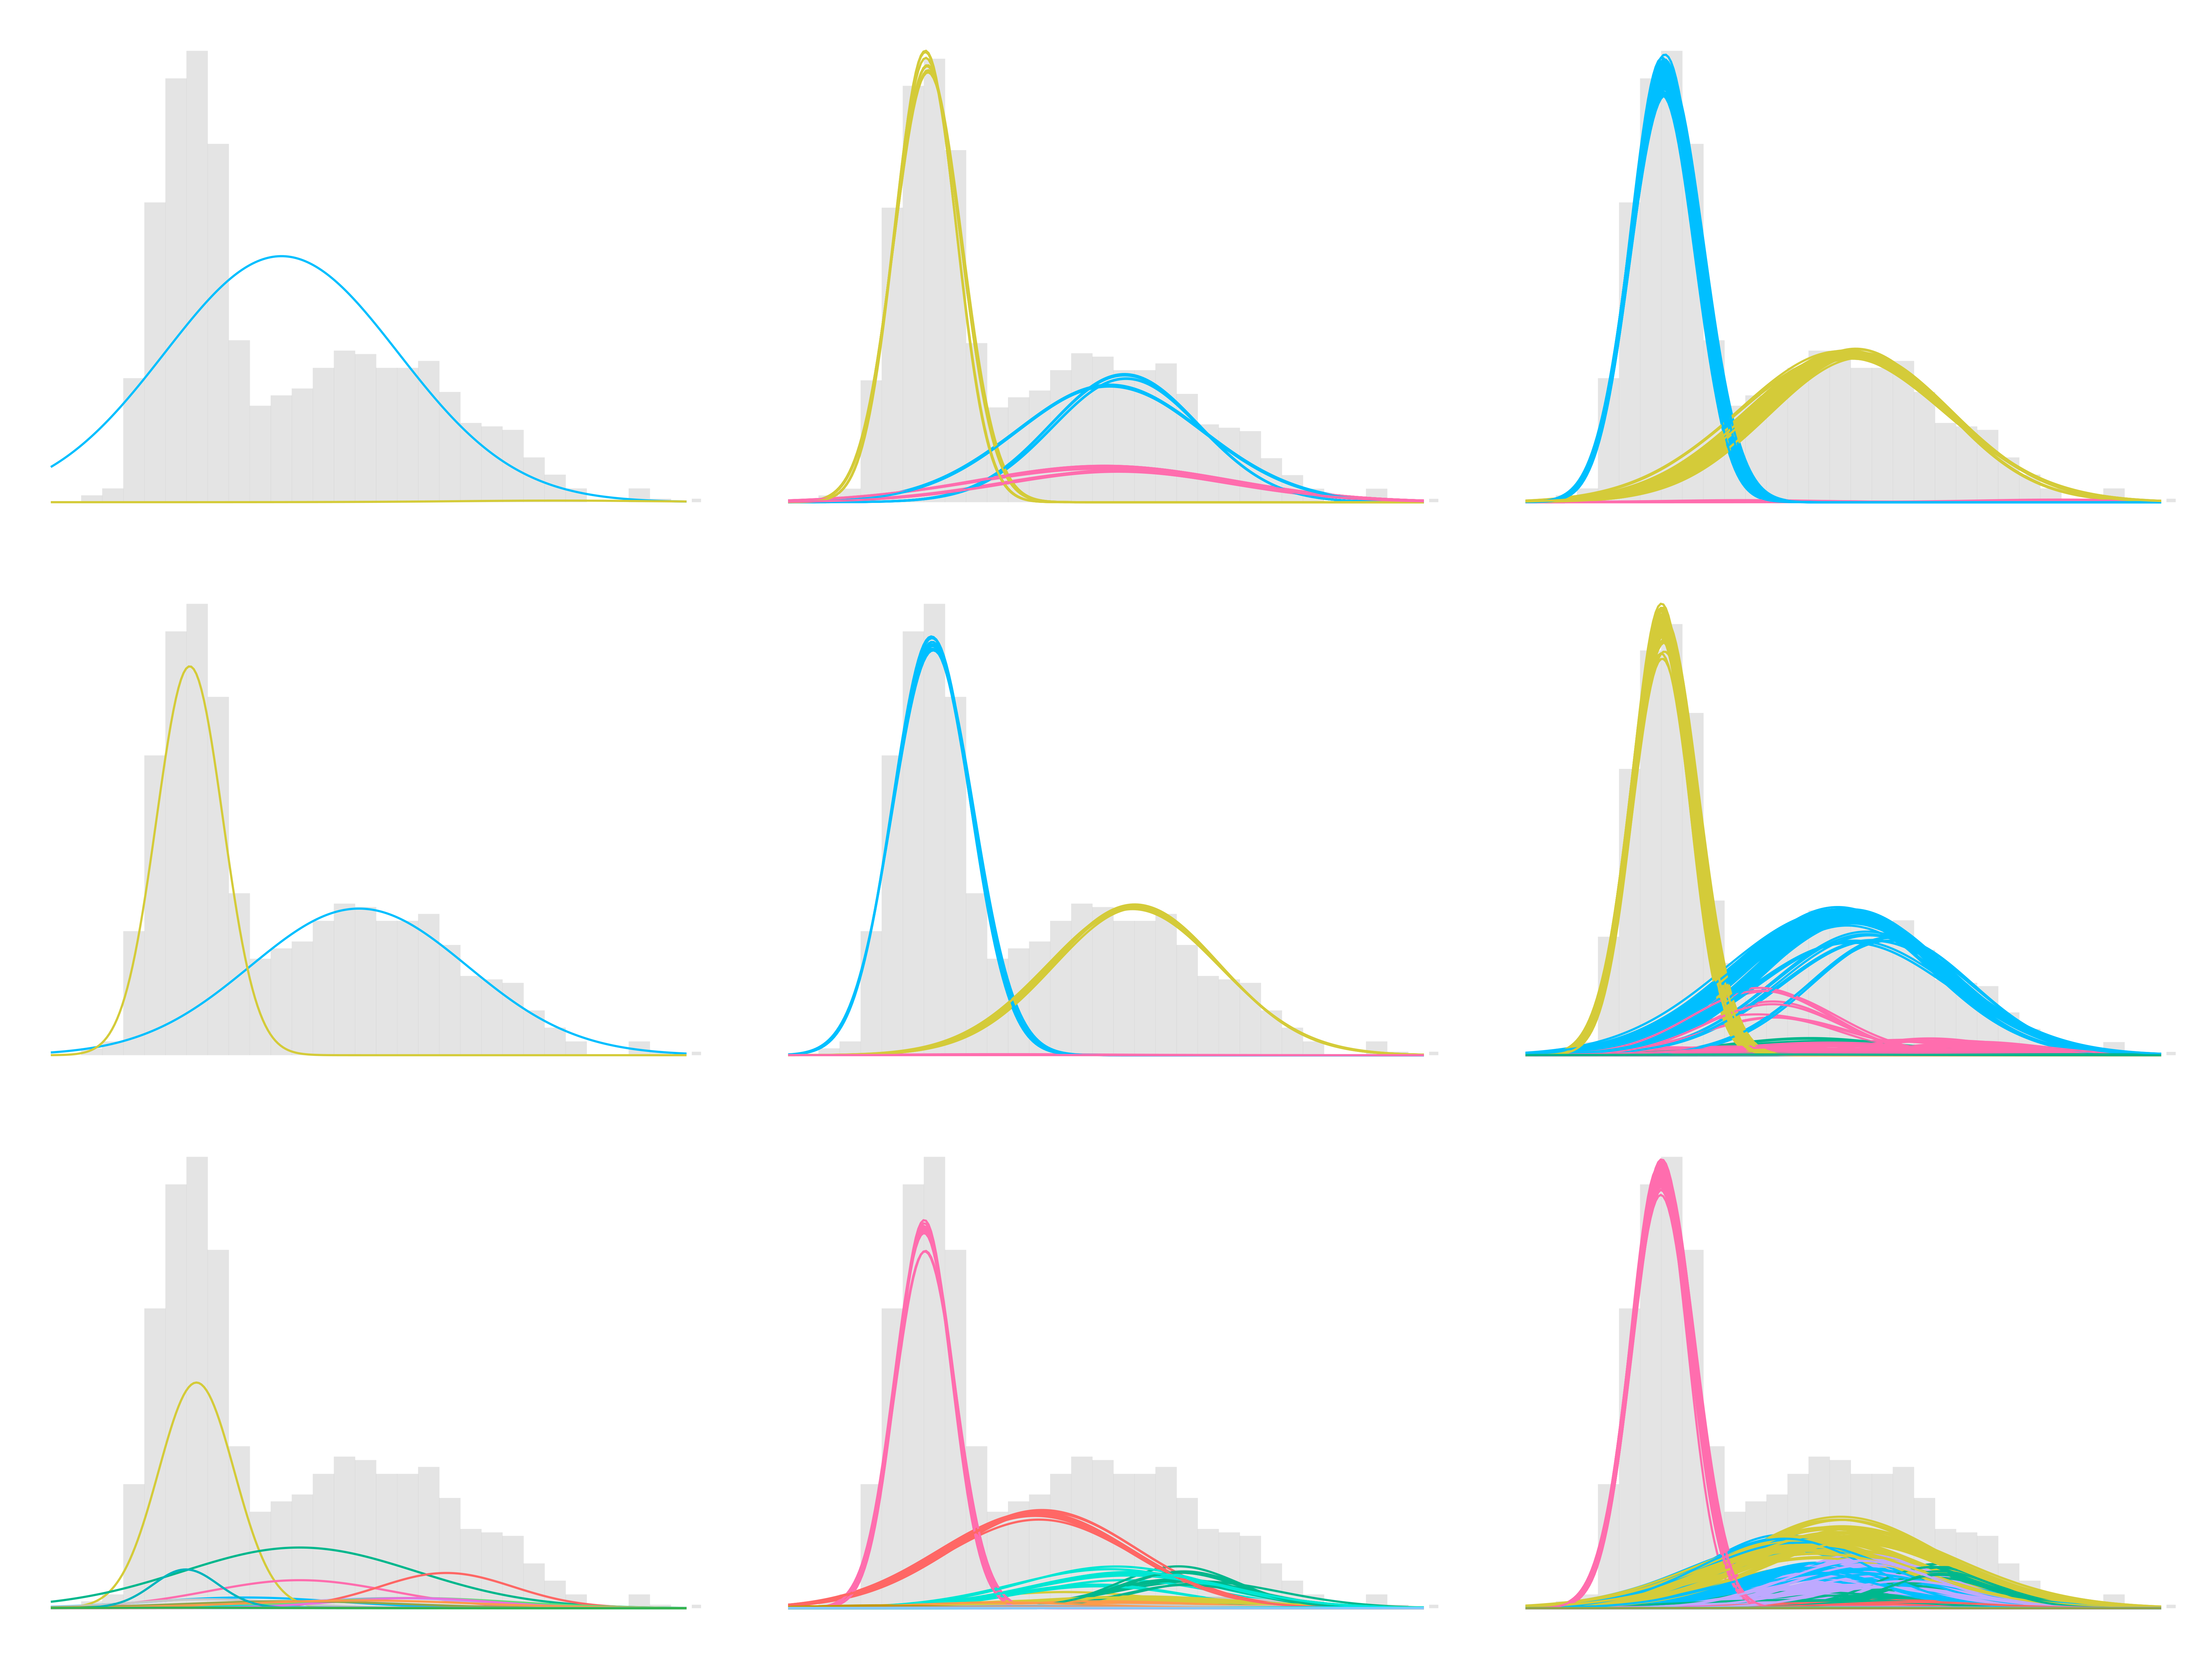

false

In [309]:
plots = @_ plot_demo.(ex_demo, res_demo) |> 
    reshape(_, (3,3)) |>
    mapslices(hstack, _, 2) |>
    vstack(_...)

drawpng600(plots, 12inch, 9inch)
draw(PNG("figures/example_runs.png", 12inch, 9inch, dpi=300), plots)
draw(SVG("figures/example_runs.svg", 12inch, 9inch), plots)

In [330]:
params_learning = copy(params)
params_learning[:num_obs] = [[10, 100, 1000]]
params_learning[:num_particle] = [100]

ex_learning = experiments(params_learning)
res_learning = run.(ex_learning, ps -> copy(ps.particles))

α=>0.1, num_particle=>100, num_obs=>[10, 100, 1000], κ_0=>0.05, μ_0=>31.45791749329243, σ2_0=>694.4932540666491, data=>[48.1544, 12.823, 96.3223, 4.78743, 59.1393, 13.5028, 14.4691, 36.0573, 69.8007, 56.0177, 4.28855, 41.5831, -2.75792, 7.70546, 37.3257, 34.2546, 50.6691, 72.057, 5.19152, 16.3712, 41.4693, 21.2713, 30.553, 12.844, 10.8835, 5.55729, 30.1081, 13.8487, 66.1584, 13.5385, 111.412, 6.80033, 8.14944, 2.16395, 62.7371, 50.1729, 21.328, 71.2991, 15.7413, 1.89317, 60.3951, 7.73363, 38.9218, 11.8892, -1.56435, 46.5582, 37.8366, 19.4491, 6.50983, 77.3425, 71.109, 13.9718, 64.4624, 53.4003, 8.32982, 12.7484, 9.39563, -1.00587, 13.0728, 51.3276, 79.4948, 2.875, 4.66231, 18.2359, 8.96974, 18.1876, 84.2116, 85.5049, 36.3938, 6.7319, 12.43, 2.83293, 19.1673, 8.46508, 7.38557, 46.4345, 28.0446, 5.60812, 41.1414, 1.21803, 47.1114, 38.95, 81.7611, 4.94365, 51.7468, 32.6432, 44.393, 54.9622, 9.82005, 1.17352, 19.2052, 53.2554, 35.9493, 46.2005, 55.6346, 7.23591, 68.9822, 12.4534, 7.25101, 

3×1×1×1 Array{Array{Array{Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess},1},1},4}:
[:, :, 1, 1] =
 Array{Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess},1}[Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess}[1+ Particle, 1+ Particle, 1+ Particle, 1+ Particle, 1+ Particle, 1+ Particle, 1+ Particle, 2+ Particle, 1+ Particle, 2+ Particle  …  1+ Particle, 1+ Particle, 1+ Particle, 2+ Particle, 1+ Particle, 1+ Particle, 1+ Particle, 1+ Particle, 1+ Particle, 1+ Particle], Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess}[2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle  …  2+ Particl

α=>10.0, num_particle=>100, num_obs=>[10, 100, 1000], κ_0=>0.05, μ_0=>31.45791749329243, σ2_0=>694.4932540666491, data=>[48.1544, 12.823, 96.3223, 4.78743, 59.1393, 13.5028, 14.4691, 36.0573, 69.8007, 56.0177, 4.28855, 41.5831, -2.75792, 7.70546, 37.3257, 34.2546, 50.6691, 72.057, 5.19152, 16.3712, 41.4693, 21.2713, 30.553, 12.844, 10.8835, 5.55729, 30.1081, 13.8487, 66.1584, 13.5385, 111.412, 6.80033, 8.14944, 2.16395, 62.7371, 50.1729, 21.328, 71.2991, 15.7413, 1.89317, 60.3951, 7.73363, 38.9218, 11.8892, -1.56435, 46.5582, 37.8366, 19.4491, 6.50983, 77.3425, 71.109, 13.9718, 64.4624, 53.4003, 8.32982, 12.7484, 9.39563, -1.00587, 13.0728, 51.3276, 79.4948, 2.875, 4.66231, 18.2359, 8.96974, 18.1876, 84.2116, 85.5049, 36.3938, 6.7319, 12.43, 2.83293, 19.1673, 8.46508, 7.38557, 46.4345, 28.0446, 5.60812, 41.1414, 1.21803, 47.1114, 38.95, 81.7611, 4.94365, 51.7468, 32.6432, 44.393, 54.9622, 9.82005, 1.17352, 19.2052, 53.2554, 35.9493, 46.2005, 55.6346, 7.23591, 68.9822, 12.4534, 7.25101,

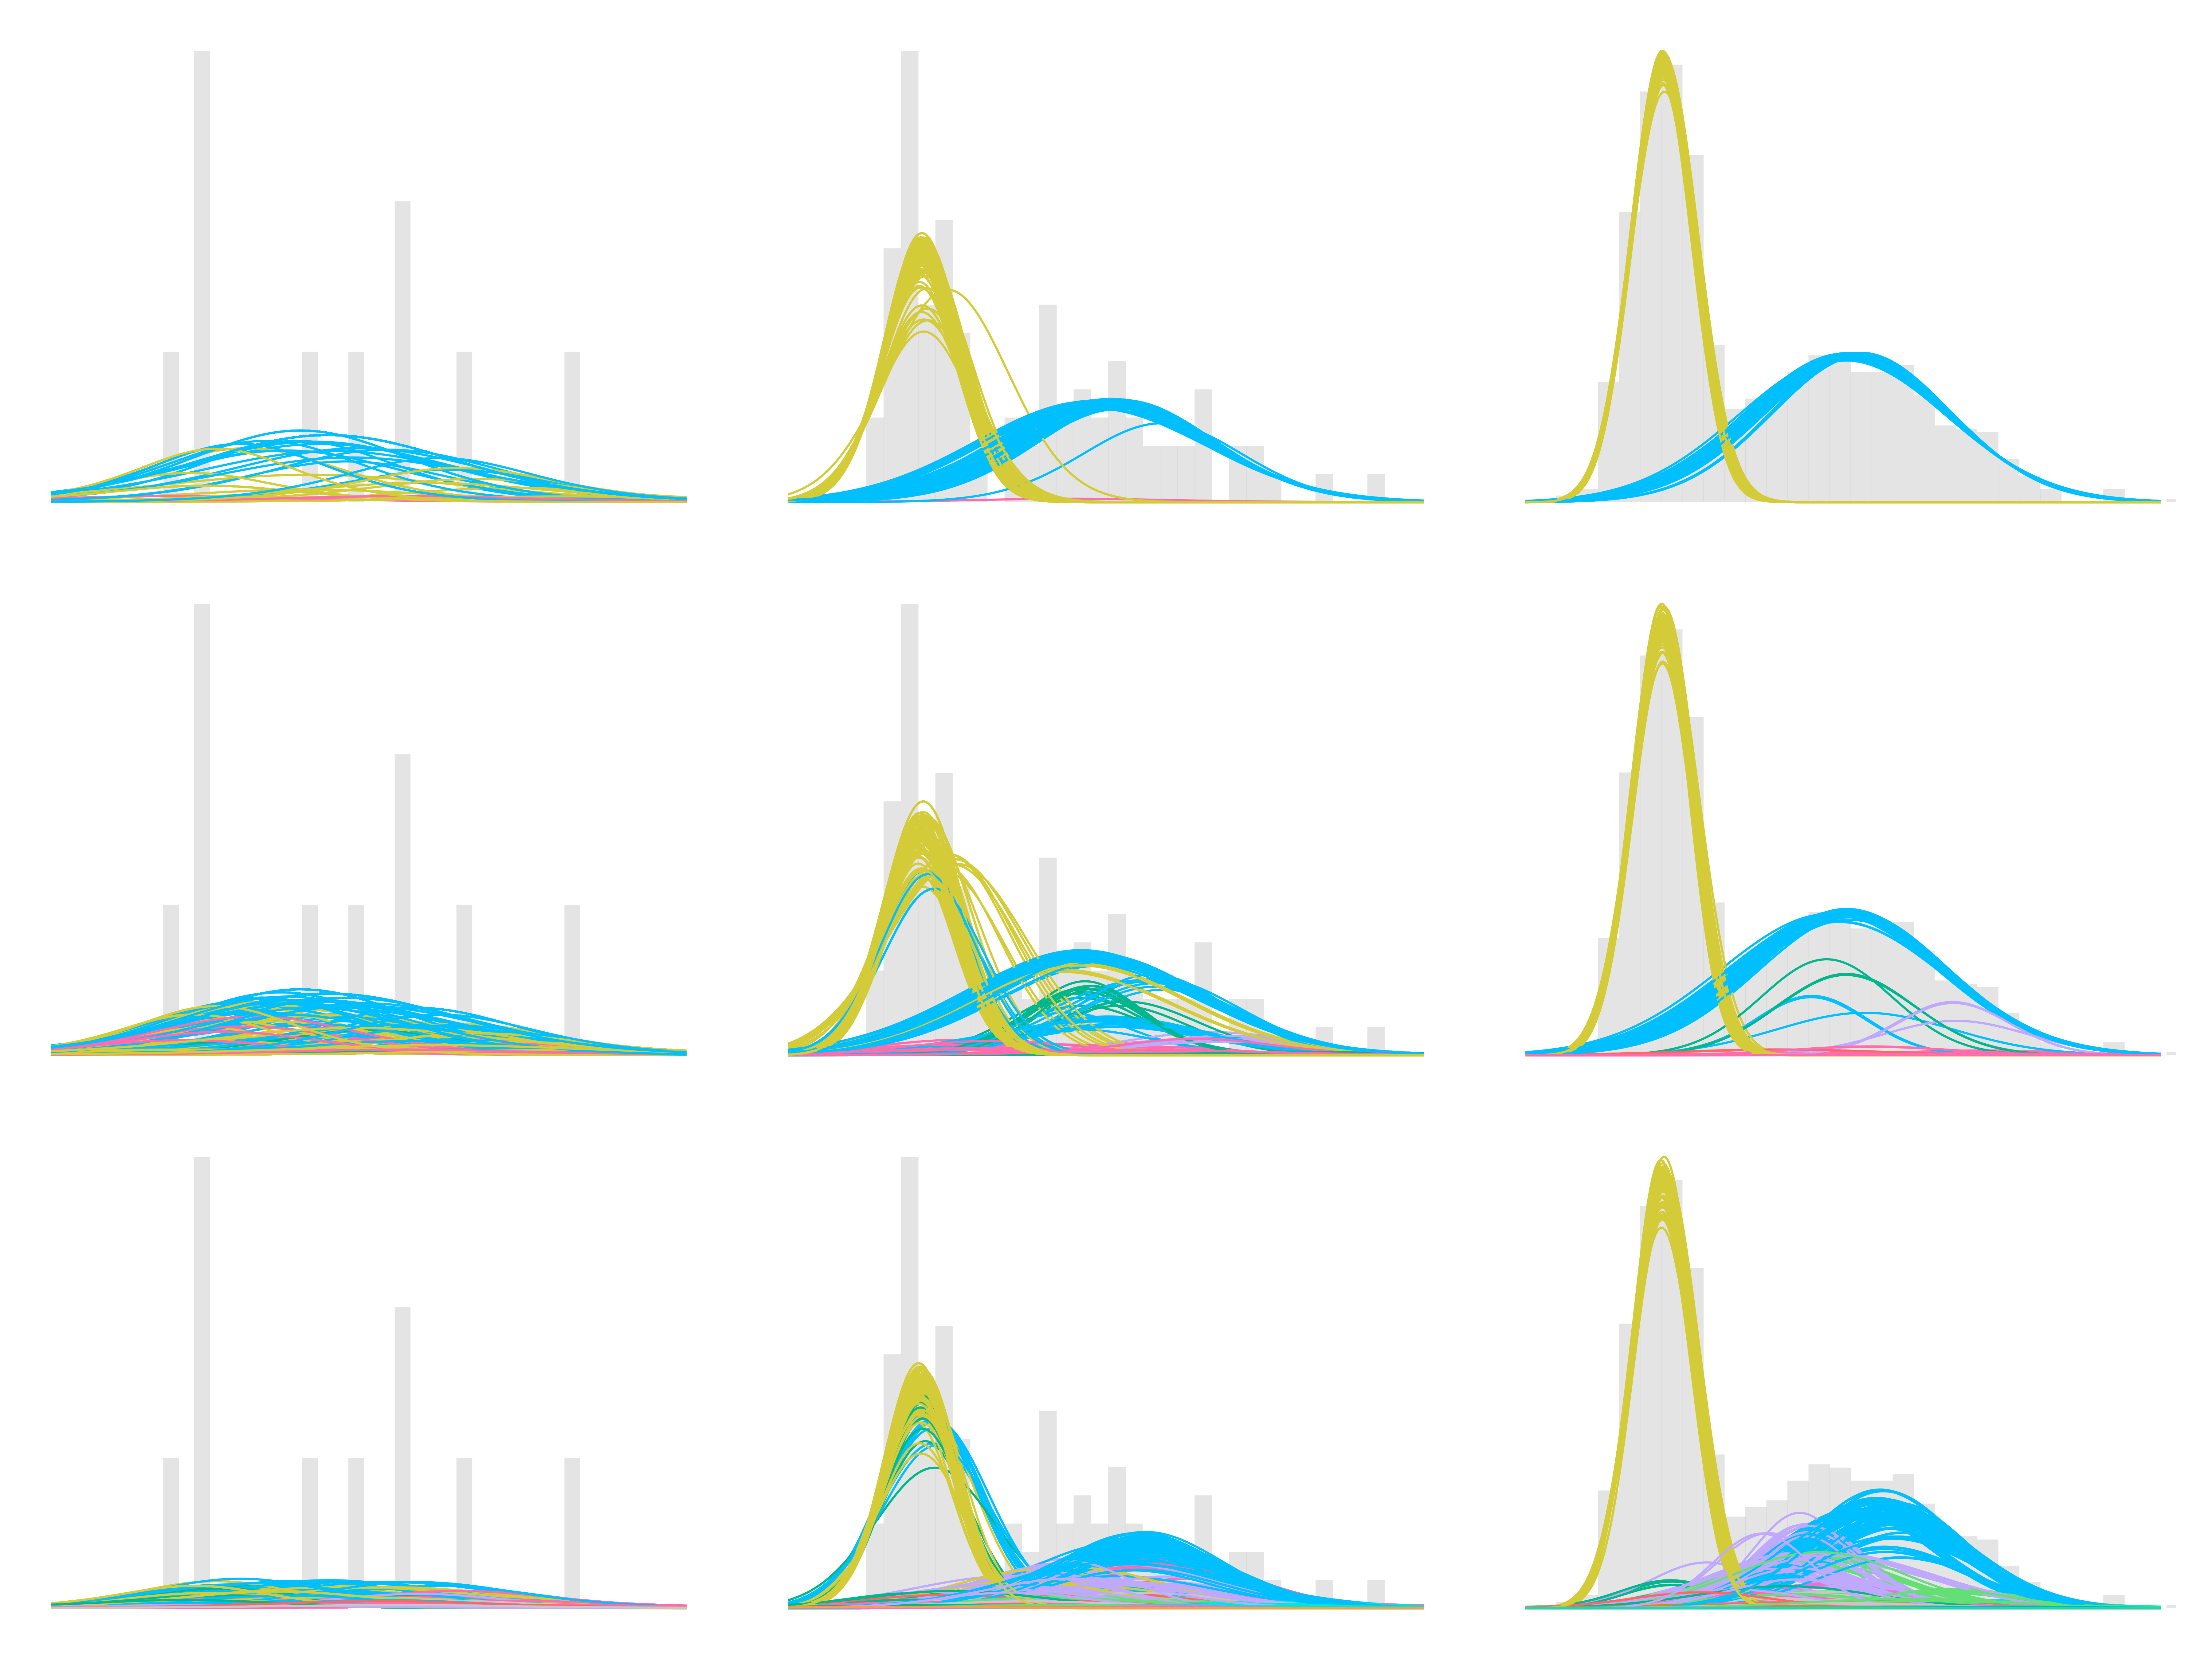

false

In [331]:
plots_learning = @_ zip(flatten.(ex_learning, :num_obs), res_learning) |>
    map(ers -> plot_demo.(ers...), _) |>
    map(x->hstack(x...), _) |>
    vstack(_...)


drawpng600(plots_learning, 12inch, 9inch)
draw(PNG("figures/example_learning.png", 12inch, 9inch, dpi=300), plots_learning)
draw(SVG("figures/example_learning.svg", 12inch, 9inch), plots_learning)

In [323]:

for i in 1:3
    hstack(plot_demo.(flatten.(ex_learning, :num_obs)[i], res_learning[i])...)
end

In [298]:
using StatsBase
methods(mean)

# 91 methods for generic function "mean":
mean(d::Distributions.DiscreteUniform) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/discreteuniform.jl:52
mean(d::Distributions.Hypergeometric) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/hypergeometric.jl:44
mean(d::Distributions.Kolmogorov) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/continuous/kolmogorov.jl:22
mean(d::Distributions.EmpiricalUnivariateDistribution) in Distributions at /home/dave/.julia/v0.6/Distributions/src/empirical.jl:40
mean(d::Distributions.UnivariateGMM) in Distributions at /home/dave/.julia/v0.6/Distributions/src/mixtures/unigmm.jl:26
mean(r::Range{#s45} where #s45<:Real) in Base at range.jl:858
mean(f::Function, a::StaticArrays.StaticArray) in StaticArrays at /home/dave/.julia/v0.6/StaticArrays/src/mapreduce.jl:231
mean(f::Function, a::StaticArrays.StaticArray, ::Type{Val{D}}) where D in StaticArrays at /home/dave/.julia/v0.6/StaticArrays/src/mapreduce.jl:233
mean(f::Union{Function, Type}, A::AbstractArray) in Base at statistics.jl:35
mean(f::Function, p::Particles.ParticleFilter) in Particles at /home/dave/.julia/v0.6/Particles/src/filters.jl:16
mean(f::Union{Function, Type}, iterable) in Base at statistics.jl:19
mean(a::StaticArrays.StaticArray) in StaticArrays at /home/dave/.julia/v0.6/StaticArrays/src/mapreduce.jl:230
mean(a::DataArrays.DataArray; skipmissing, skipna) in DataArrays at /home/dave/.julia/v0.6/DataArrays/src/reduce.jl:157
mean(a::DataArrays.DataArray, w::StatsBase.Weights; skipmissing, skipna) in DataArrays at /home/dave/.julia/v0.6/DataArrays/src/reduce.jl:209
mean(a::DataArrays.DataArray, w::StatsBase.Weights{W,V,#59#V} where #59#V<:AbstractArray{V,1}; skipmissing, skipna) where {W, V<:DataArrays.DataArray} in DataArrays at /home/dave/.julia/v0.6/DataArrays/src/reduce.jl:219
mean(A::AbstractArray{T,N} where N, w::StatsBase.AbstractWeights{W,T,V} where V<:AbstractArray{T,1} where T<:Real, dim::Int64) where {T<:Number, W<:Real} in StatsBase at /home/dave/.julia/v0.6/StatsBase/src/weights.jl:472
mean(a::StaticArrays.StaticArray, ::Type{Val{D}}) where D in StaticArrays at /home/dave/.julia/v0.6/StaticArrays/src/mapreduce.jl:232
mean(A::DataArrays.DataArray{T,N} where N, region; skipmissing, skipna) where T in DataArrays at /home/dave/.julia/v0.6/DataArrays/src/reducedim.jl:338
mean(A::AbstractArray) in Base at statistics.jl:36
mean(A::AbstractArray, w::StatsBase.AbstractWeights) in StatsBase at /home/dave/.julia/v0.6/StatsBase/src/weights.jl:458
mean(A::AbstractArray{T,N} where N, region) where T in Base at statistics.jl:57
mean(d::Distributions.Bernoulli) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/bernoulli.jl:58
mean(d::Distributions.BetaBinomial) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/betabinomial.jl:56
mean(d::Distributions.Binomial) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/binomial.jl:66
mean(d::Distributions.Categorical) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/categorical.jl:67
mean(d::Distributions.Geometric) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/geometric.jl:53
mean(d::Distributions.NegativeBinomial) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/negativebinomial.jl:71
mean(d::Distributions.FisherNoncentralHypergeometric) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/noncentralhypergeometric.jl:78
mean(d::Distributions.WalleniusNoncentralHypergeometric) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/noncentralhypergeometric.jl:117
mean(d::Distributions.Poisson) in Distributions at /home/dave/.julia/v0.6/Distributions/src/univariate/discrete/poisson.jl:49
mean(d::Distributions.Skellam) in Distributions at /home/dave/.julia/v0.6/Distribu

In [300]:

Particles.state_entropy(ps::Vector{<:InfiniteParticle}) = mean(state_entropy.(ps), Weights(weight.(ps)))

In [304]:
state_entropy.(res_demo) ./ log(2)

3×3×1×1 Array{Float64,4}:
[:, :, 1, 1] =
 0.0543827  1.43553  1.00528
 1.00259    1.00208  1.1572 
 3.10734    2.49727  2.09868

# Measuring successful learning

Expected value of function given posterior is approximated with a weighted average of function applied to particles.

$ E_{p(z_{1\ldots N} | x_{1\ldots N})}(f(z_{1\ldots, N})) \approx \sum_i w_i f(z_{1\ldots N}^{(i)}) $

## Probability of exactly 2 clusters

In [147]:
function p_of_K(d)
    pks = d[:p_of_K]
    max_k = maximum(length.(pks))
    ps = zeros(Float64, max_k)
    for pk in pks
        ps[1:length(pk)] .+= pk
    end
    DataFrame(K=1:max_k, p_of_K = ps ./ size(d,1))
end

run4_p_of_K = @_ run4_ex_res |>
    by(_, [:num_particle, :num_obs, :α], p_of_K)

883×5 DataFrames.DataFrame
│ Row │ num_particle │ num_obs │ α    │ K  │ p_of_K      │
├─────┼──────────────┼─────────┼──────┼────┼─────────────┤
│ 1   │ 1            │ 10      │ 0.01 │ 1  │ 0.94        │
│ 2   │ 1            │ 10      │ 0.01 │ 2  │ 0.06        │
│ 3   │ 1            │ 50      │ 0.01 │ 1  │ 0.94        │
│ 4   │ 1            │ 50      │ 0.01 │ 2  │ 0.06        │
│ 5   │ 1            │ 100     │ 0.01 │ 1  │ 0.94        │
│ 6   │ 1            │ 100     │ 0.01 │ 2  │ 0.06        │
│ 7   │ 1            │ 500     │ 0.01 │ 1  │ 0.92        │
│ 8   │ 1            │ 500     │ 0.01 │ 2  │ 0.08        │
│ 9   │ 1            │ 1000    │ 0.01 │ 1  │ 0.92        │
│ 10  │ 1            │ 1000    │ 0.01 │ 2  │ 0.08        │
│ 11  │ 1            │ 5000    │ 0.01 │ 1  │ 0.92        │
⋮
│ 872 │ 1000         │ 5000    │ 10.0 │ 23 │ 0.031754    │
│ 873 │ 1000         │ 5000    │ 10.0 │ 24 │ 0.0185189   │
│ 874 │ 1000         │ 5000    │ 10.0 │ 25 │ 0.0128327   │
│ 875 │ 1000         │ 5000    │ 10.0 │ 26 │ 0.00636518  │
│ 876 │ 1000         │ 5000    │ 10.0 │ 27 │ 0.00343483  │
│ 877 │ 1000         │ 5000    │ 10.0 │ 28 │ 0.0018759   │
│ 878 │ 1000         │ 5000    │ 10.0 │ 29 │ 0.000660491 │
│ 879 │ 1000         │ 5000    │ 10.0 │ 30 │ 0.000329266 │
│ 880 │ 1000         │ 5000    │ 10.0 │ 31 │ 0.000116756 │
│ 881 │ 1000         │ 5000    │ 10.0 │ 32 │ 0.000100854 │
│ 882 │ 1000         │ 5000    │ 10.0 │ 33 │ 2.42931e-5  │
│ 883 │ 1000         │ 5000    │ 10.0 │ 34 │ 1.20852e-5  │

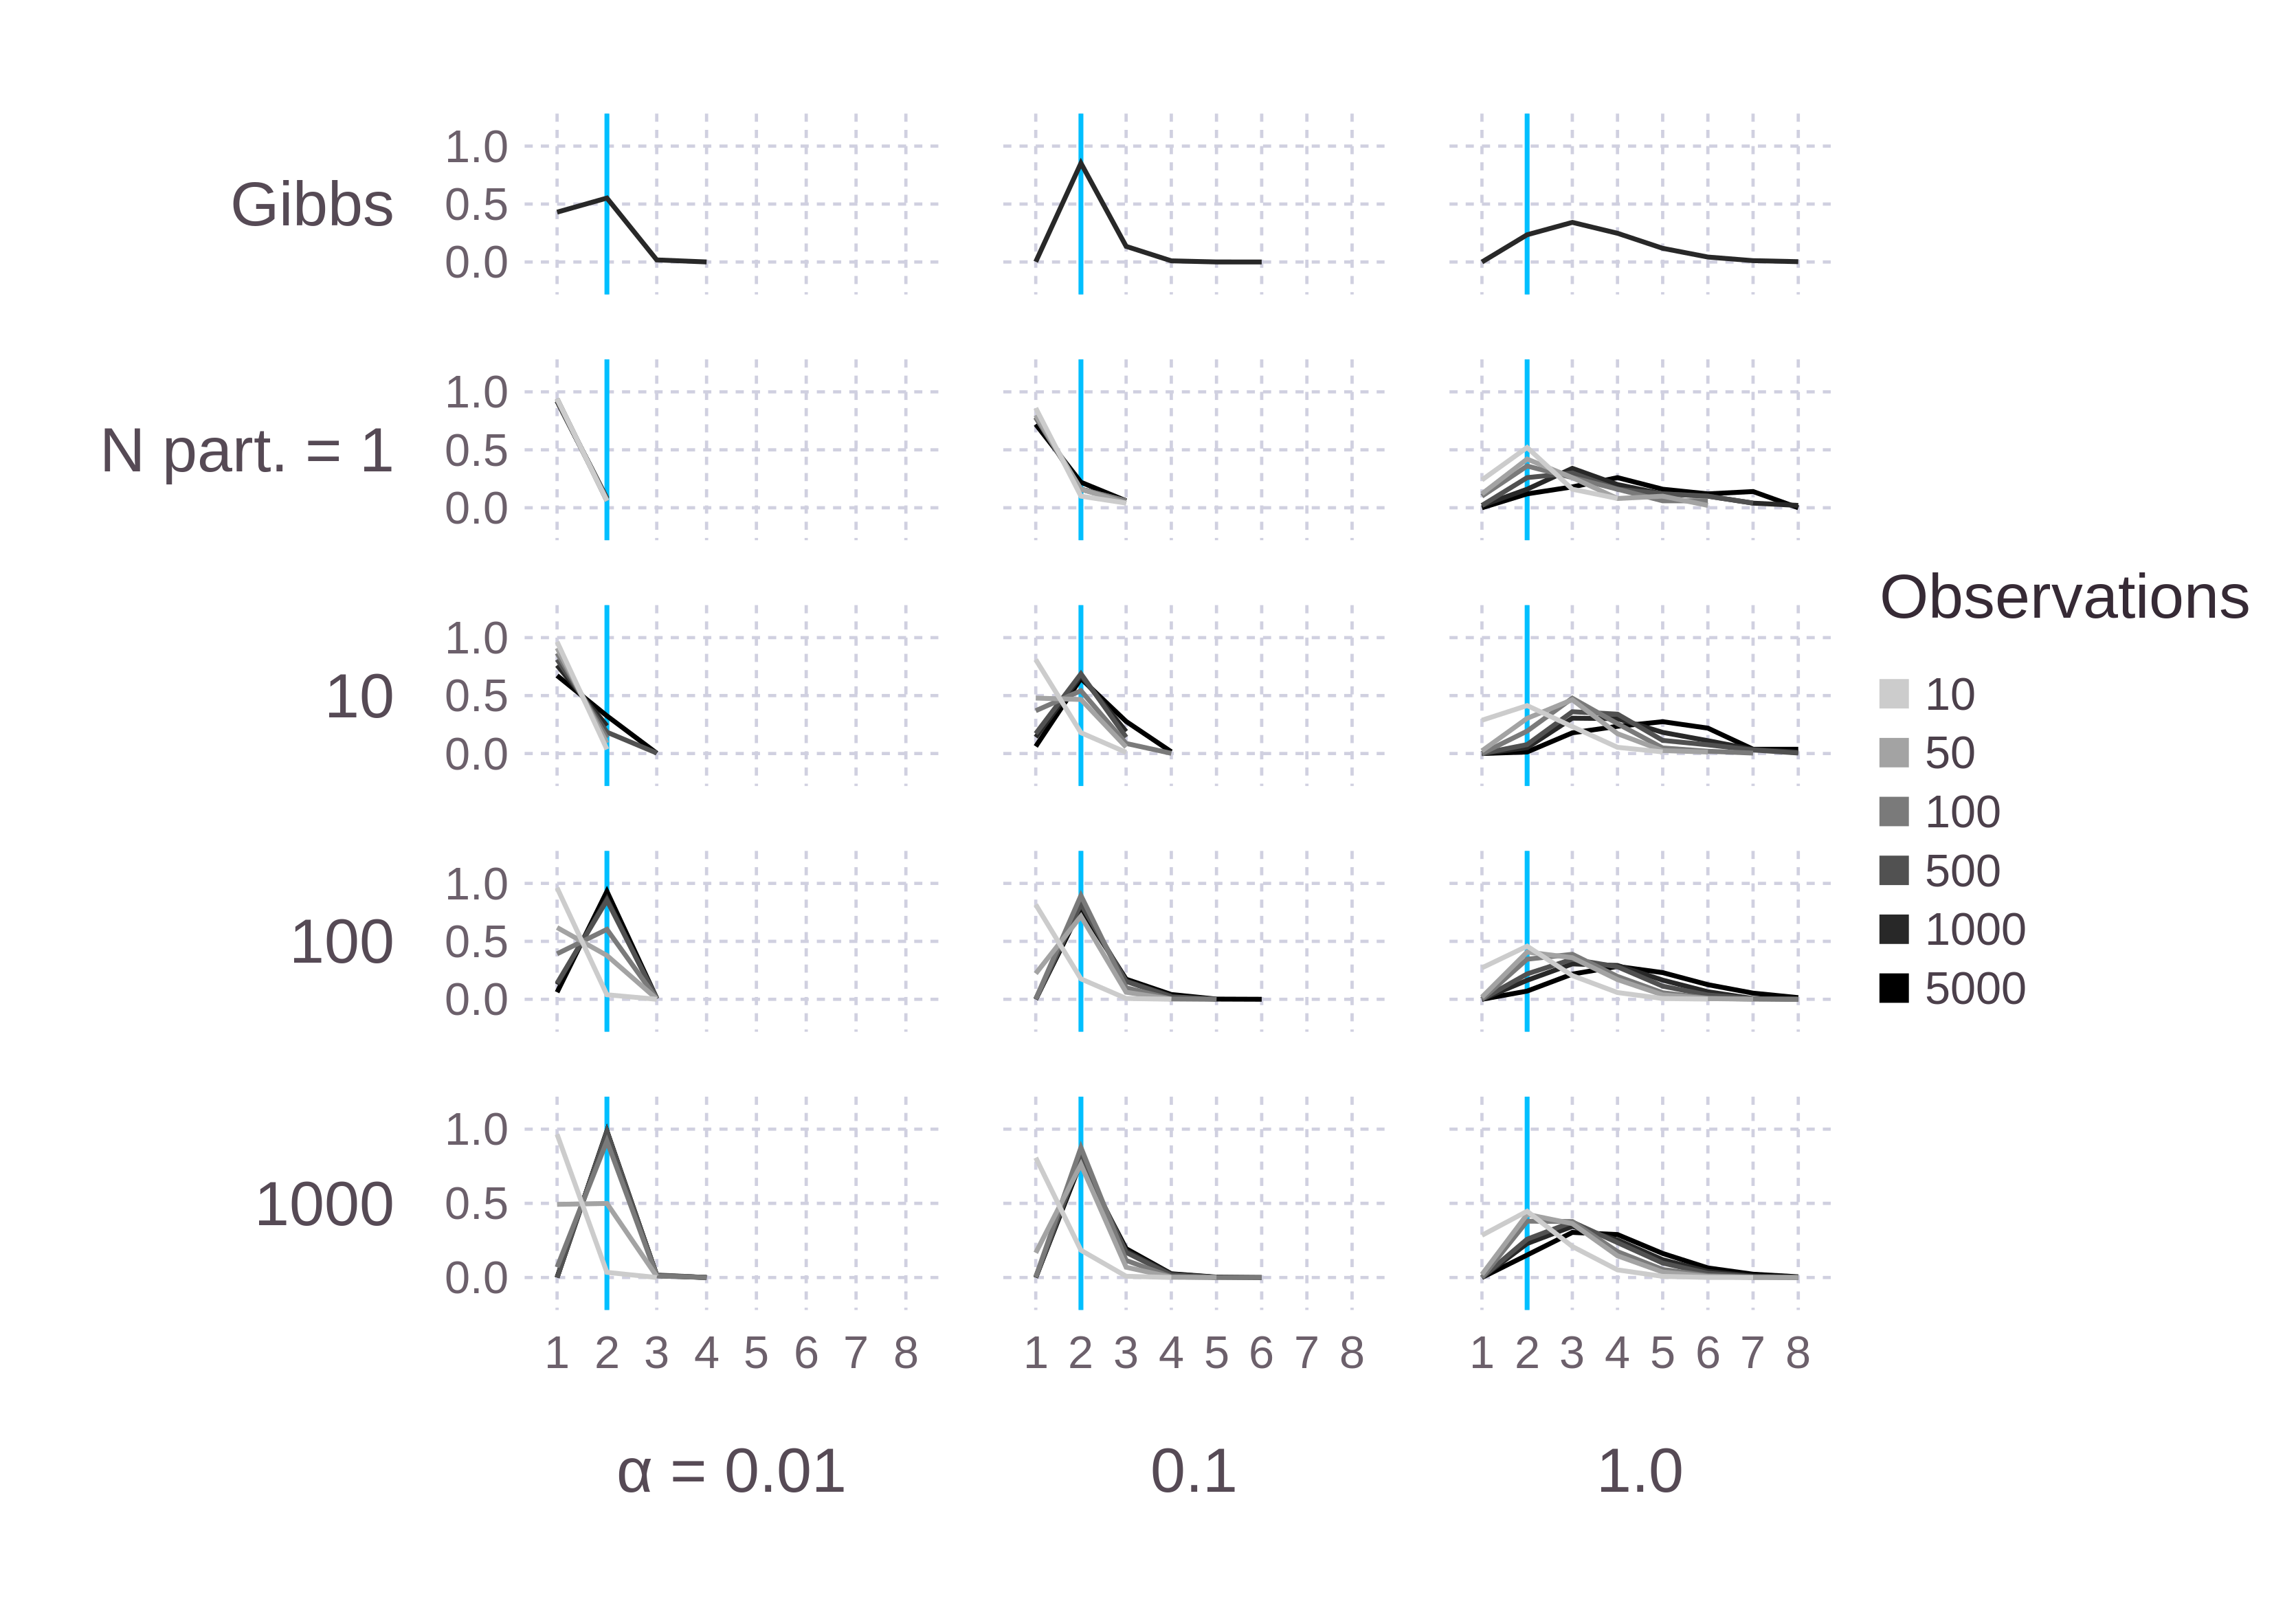

false

In [333]:
gibbs_p_of_K = @_ zip(gibbs_exs, gibbs_res) |>
    [Dict(er...) for er in _] |>
    dictofarrays |>
    DataFrame |>
    by(_, [:num_particle, :num_obs, :α], p_of_K)

plot_p_of_K = @_ @where(gibbs_p_of_K, :num_obs .== 1000, :num_particle .== 1000) |>
    @transform(_, num_particle_ = "Gibbs") |>
    vcat(_, @transform(run4_p_of_K, num_particle_ = label_minimum_with(:num_particle, "N part. = "))) |>
    @transform(_, α_str = label_minimum_with(:α, "α = ")) |>
    @where(_, :α .!= 10, :K .< 9) |>
    plot(_, ygroup=:num_particle_, xgroup=:α_str,
         Geom.subplot_grid(layer(_,
                                 x=:K, y=:p_of_K,
                                 ygroup=:num_particle_, xgroup=:α_str,
                                 color=:num_obs,
                                 Geom.line),
                           layer(by(_, [:num_particle_, :α_str], (d)->DataFrame(K=2)),
                                 xintercept = :K,
                                 ygroup=:num_particle_, xgroup=:α_str,
                                 Geom.vline),
                           Guide.xticks(orientation=:horizontal),
                           Coord.cartesian(xmin=1)),
         Scale.color_discrete(ngray(0.8, 0.0), levels=sort(unique(run4_ex_res[:num_obs]))),
         Guide.colorkey(title="Observations"), 
         Guide.ylabel(""),
         Guide.xlabel(""))

drawpng600(plot_p_of_K)
draw(SVG("figures/pofK_summary.svg"), plot_p_of_K)

## Average number of clusters

Number of clusters **grows without bound** given more data.

Filter can **never forget a cluster** it's created in the past (unlike batch algorithm that can re-visit)

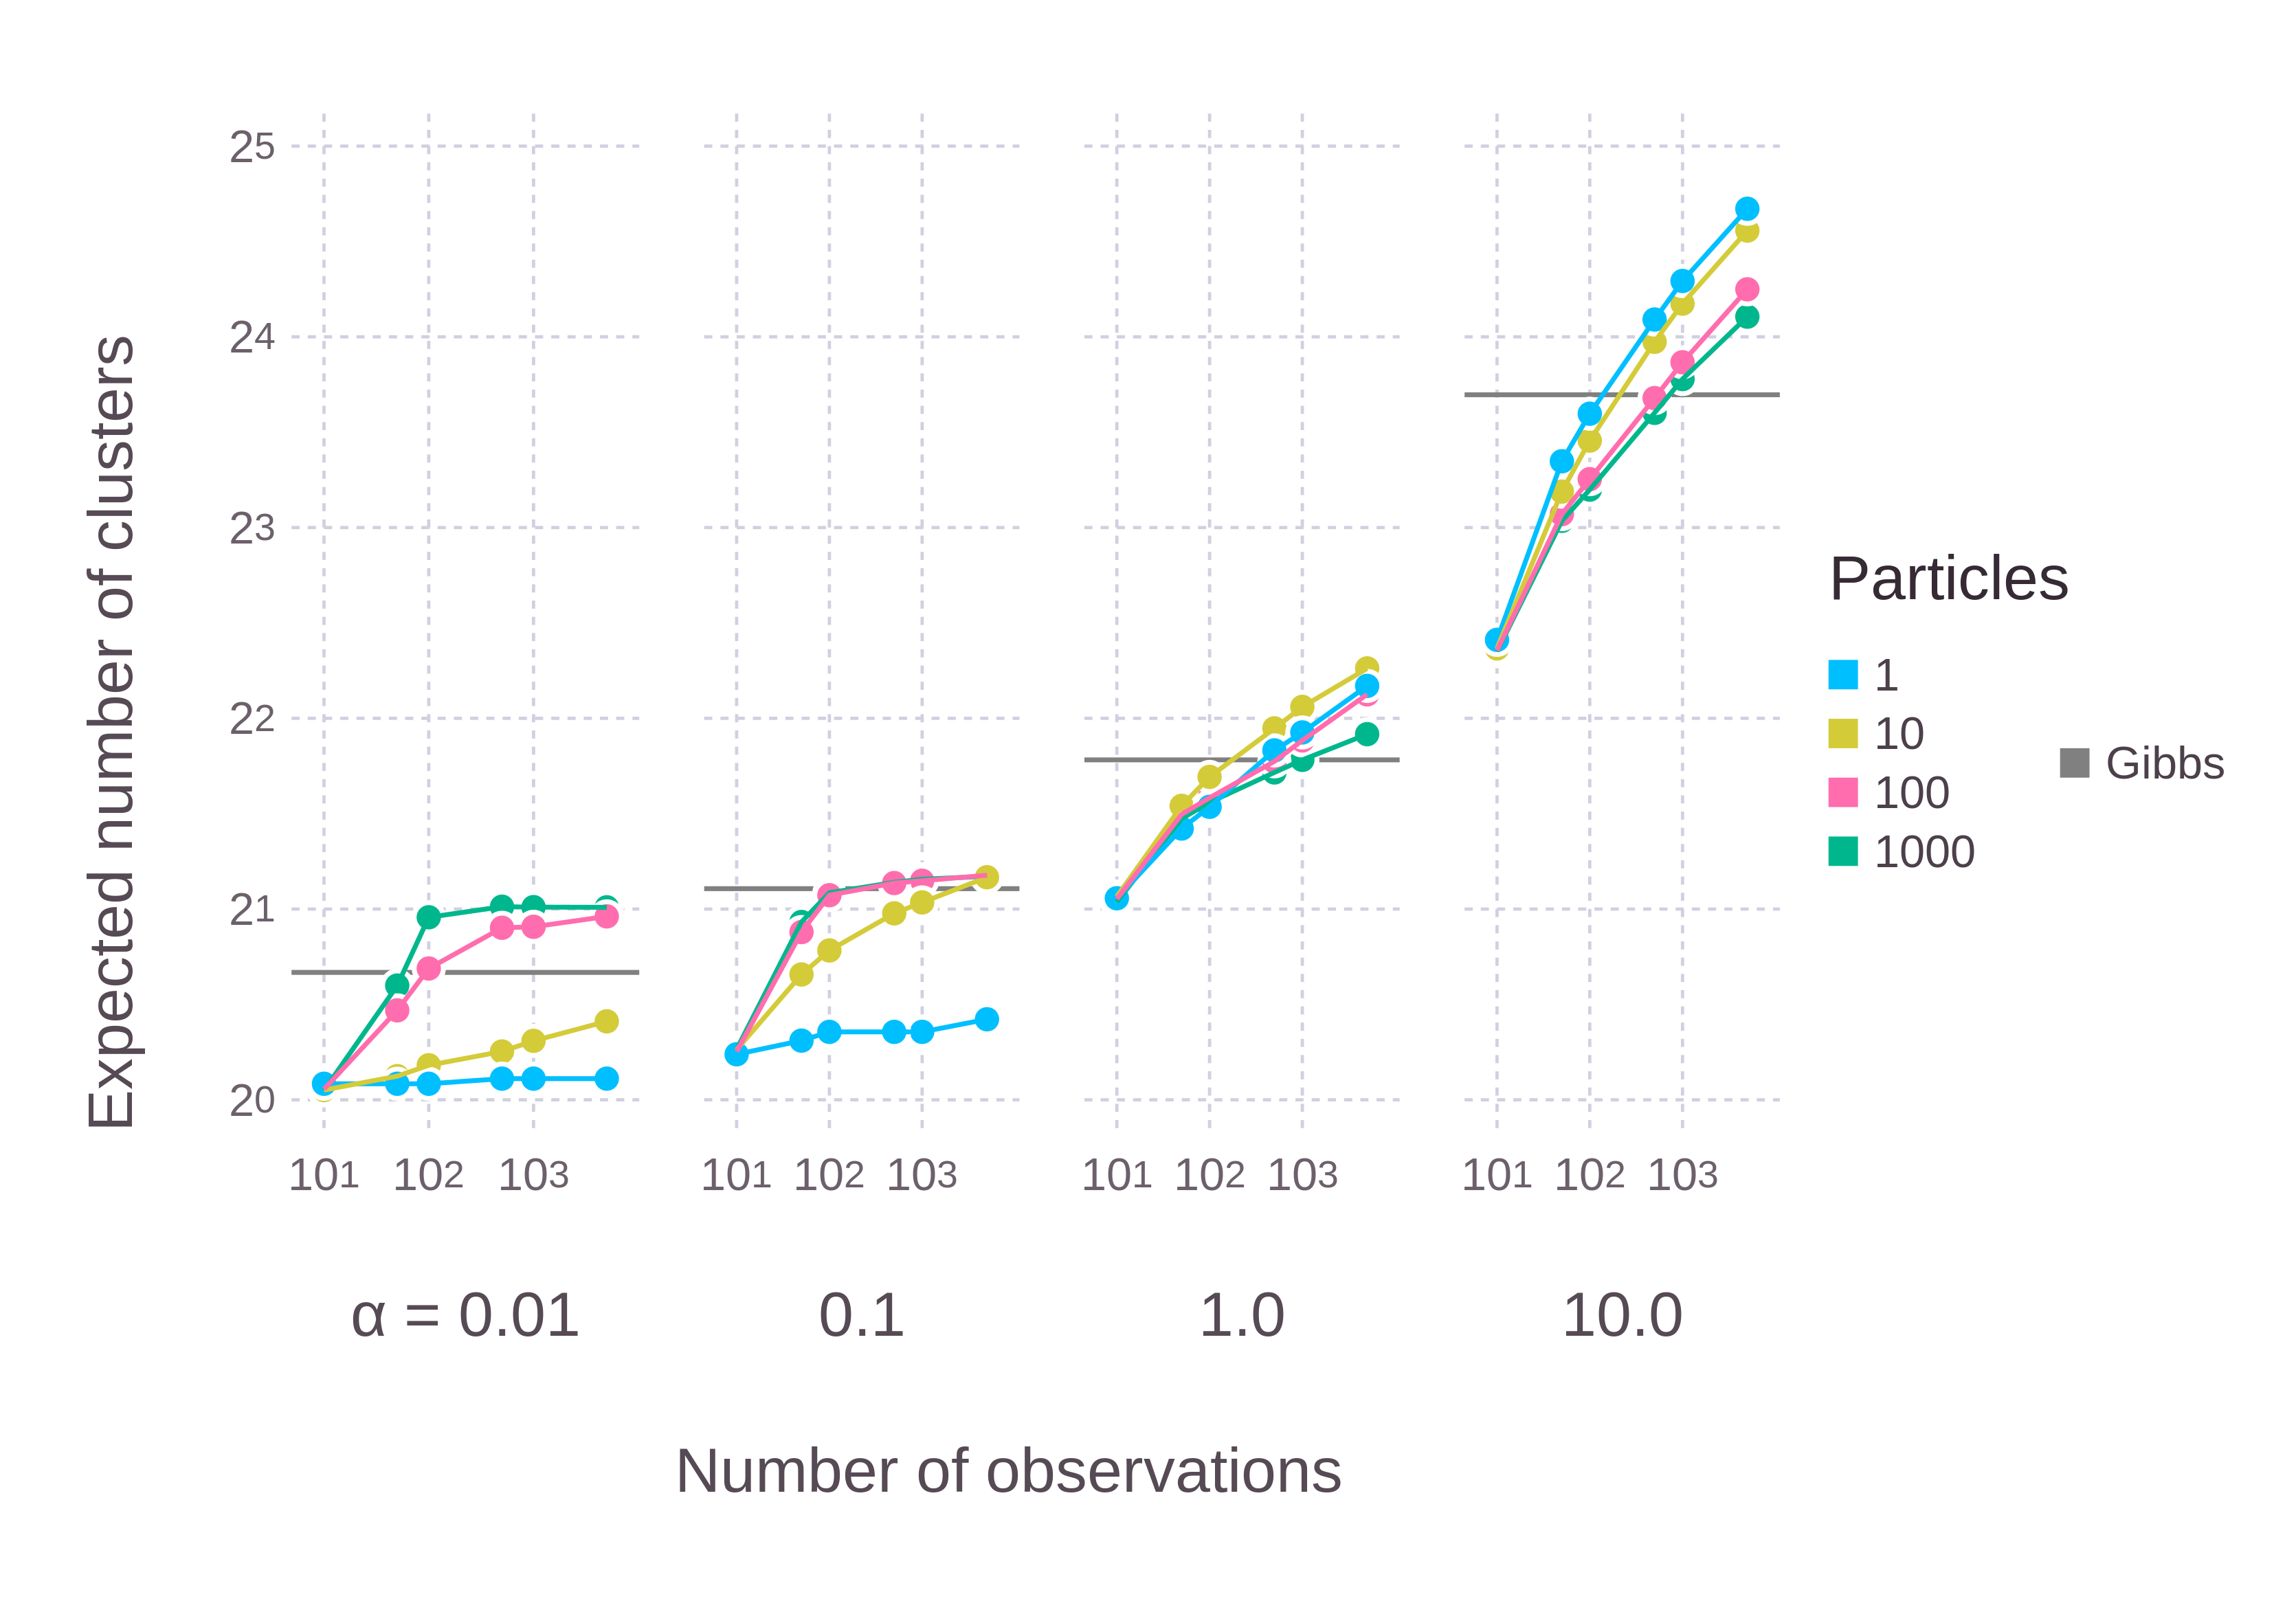

false

In [336]:
run4_meanK = plot(run4_summary, xgroup=:α_str,
     Geom.subplot_grid(layer(run4_summary, 
                             x=:num_obs, y=:avg_K_mean, color=:num_particle, xgroup=:α_str,
                             Geom.line, Geom.point),
                       layer(gibbs_summary,
                             yintercept=:avg_K_mean, xgroup=:α_str,
                             Geom.hline,
                             Theme(default_color=Gray(0.5))),
                             Coord.cartesian(xmin=1)),
     Scale.x_log10, Scale.y_log2, Scale.color_discrete,
     Guide.ylabel("Expected number of clusters"),
     Guide.xlabel("Number of observations"),
     Guide.colorkey(title="Particles"),
     Guide.manual_color_key("", ["Gibbs"], [Gray(0.5)]))

drawpng600(run4_meanK)
draw(SVG("figures/meanK_summary.svg"), run4_meanK)

## Average entropy of partition

Less sensitive to adding tiny clusters

Entropy of two even partitions $= 1 \mathrm{bit}$

Adding a third category with few observations $\approx 1 \mathrm{bit}$

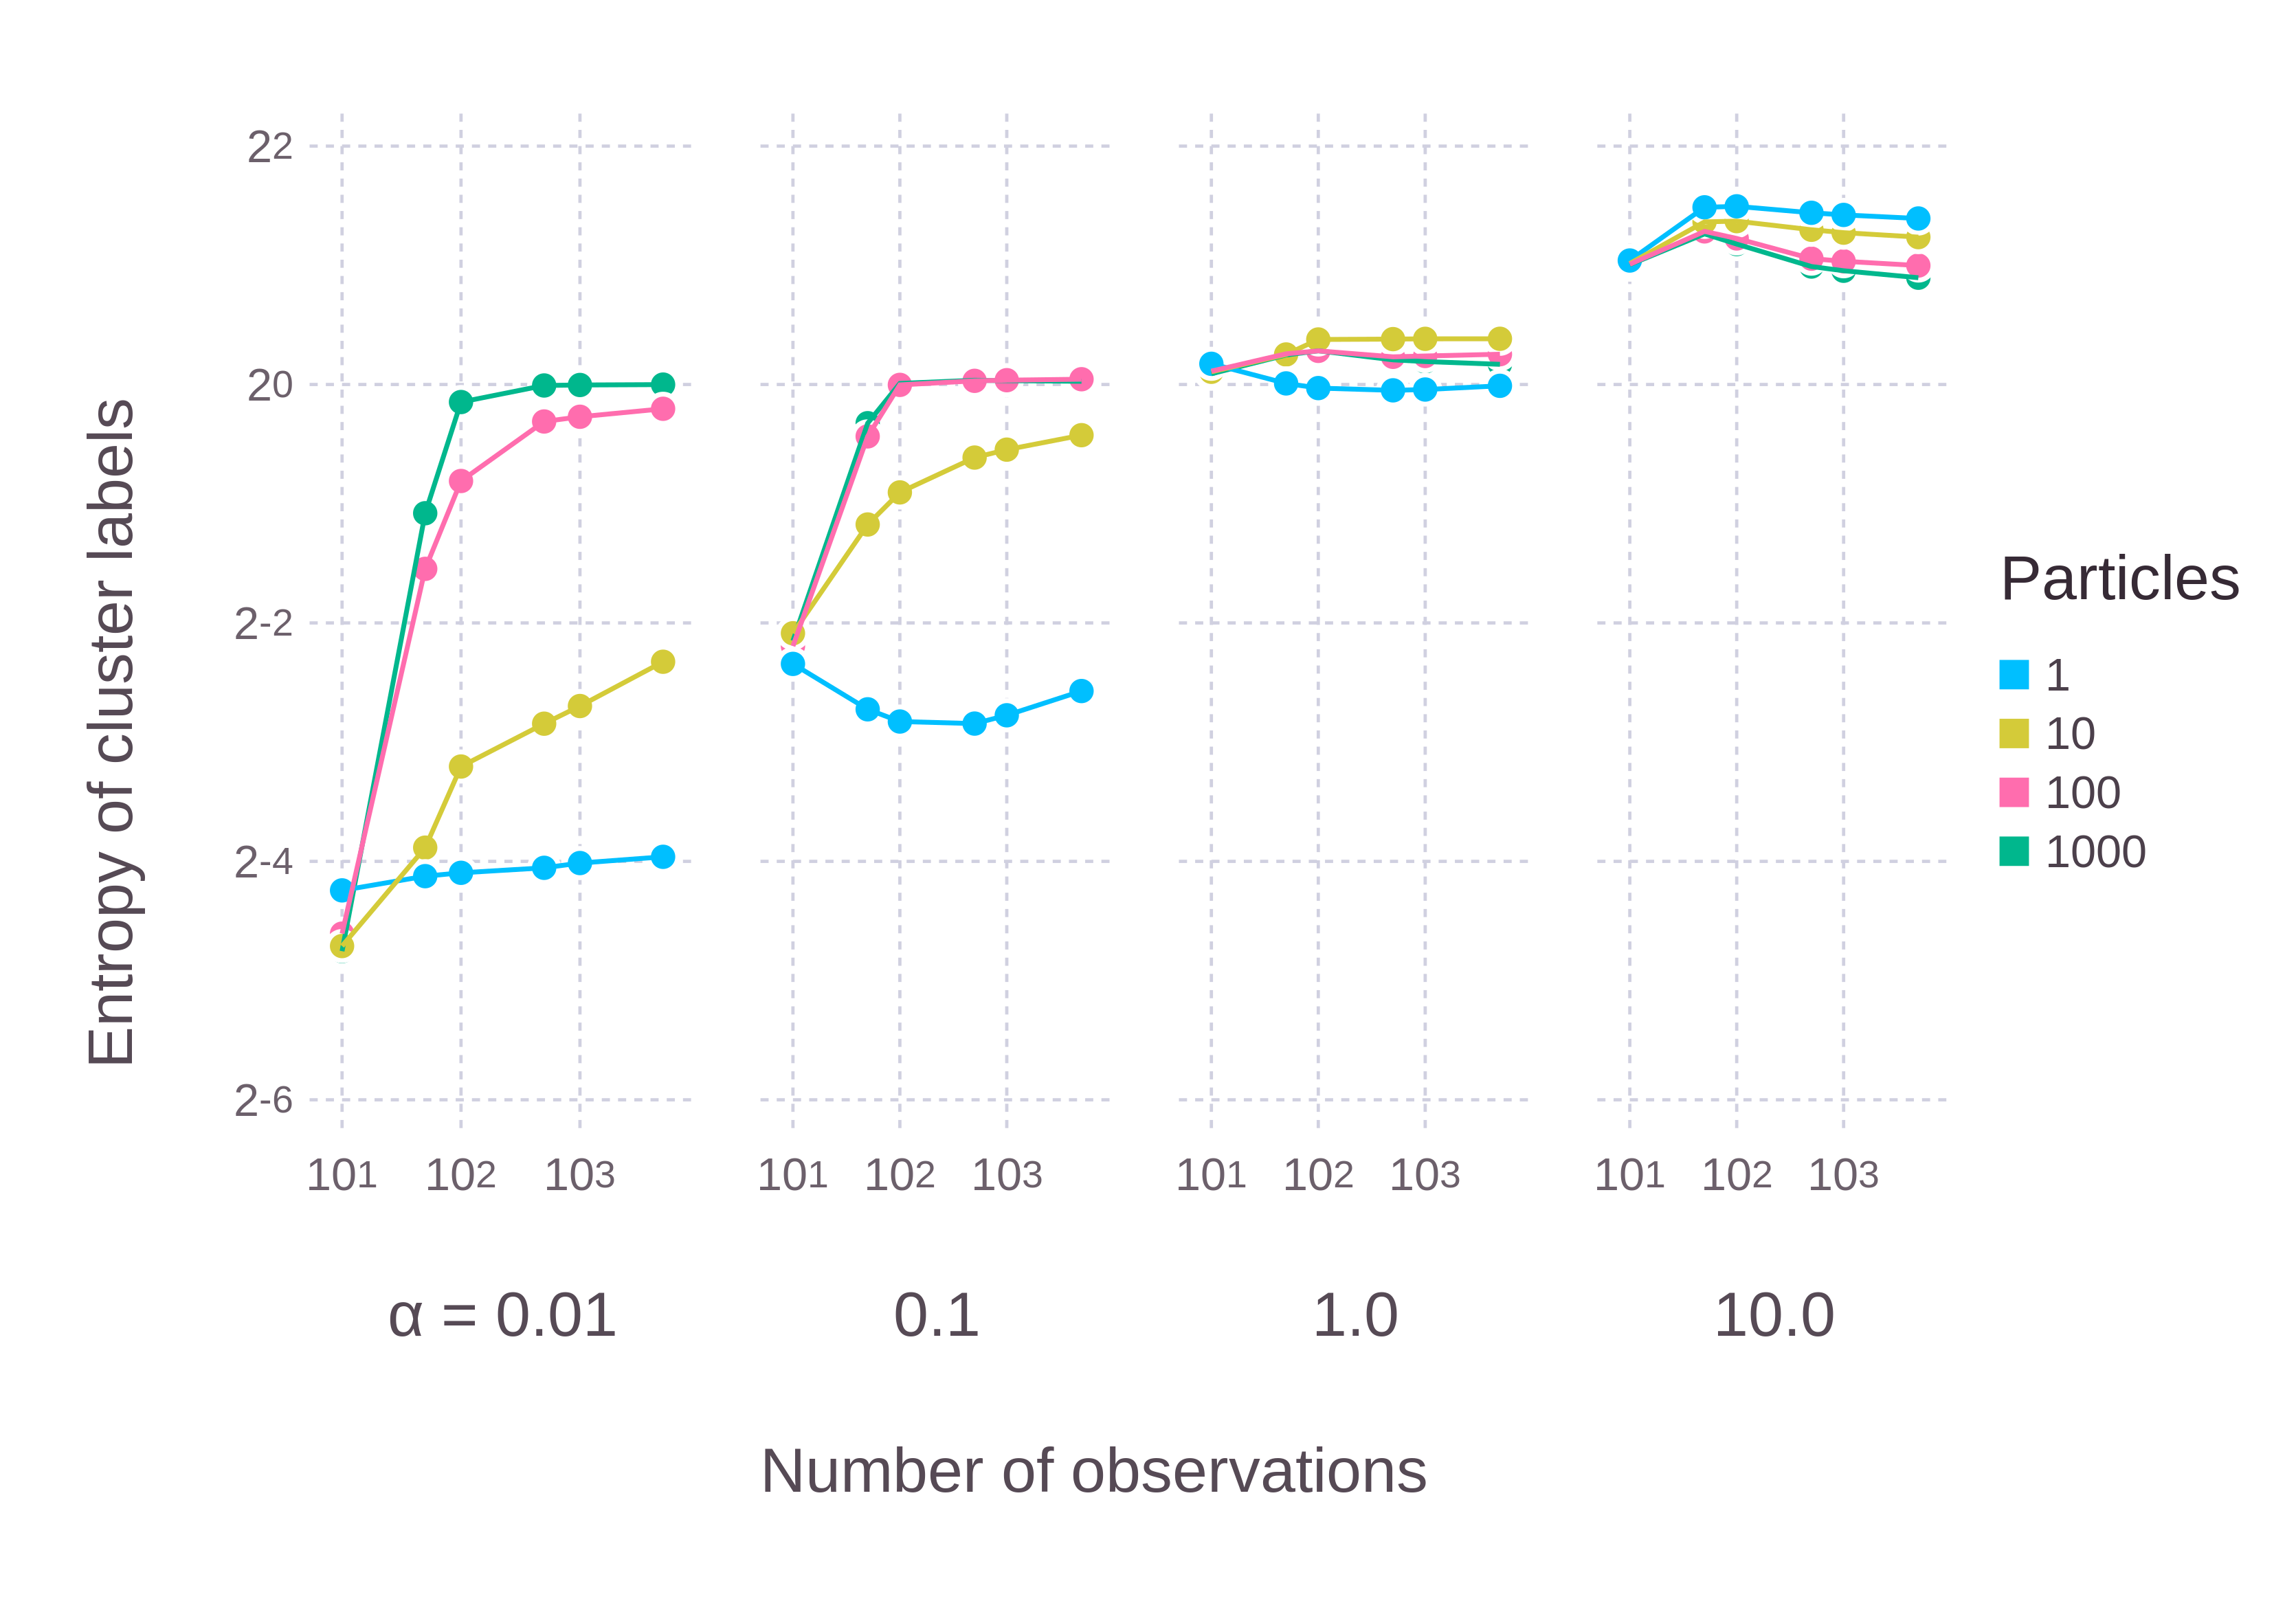

false

In [186]:
p = plot(run4_summary, xgroup=:α_str,
     Geom.subplot_grid(layer(run4_summary, 
                             x=:num_obs, y=:avg_entropy_bits, color=:num_particle, xgroup=:α_str,
                             Geom.line, Geom.point),
                       Coord.cartesian(xmin=1)),
     Scale.x_log10, Scale.y_log2, Scale.color_discrete,
     Guide.ylabel("Entropy of cluster labels"),
     Guide.xlabel("Number of observations"),
     Guide.colorkey(title="Particles"))
drawpng600(p)
draw(SVG("figures/entropy_summary.svg"), p)

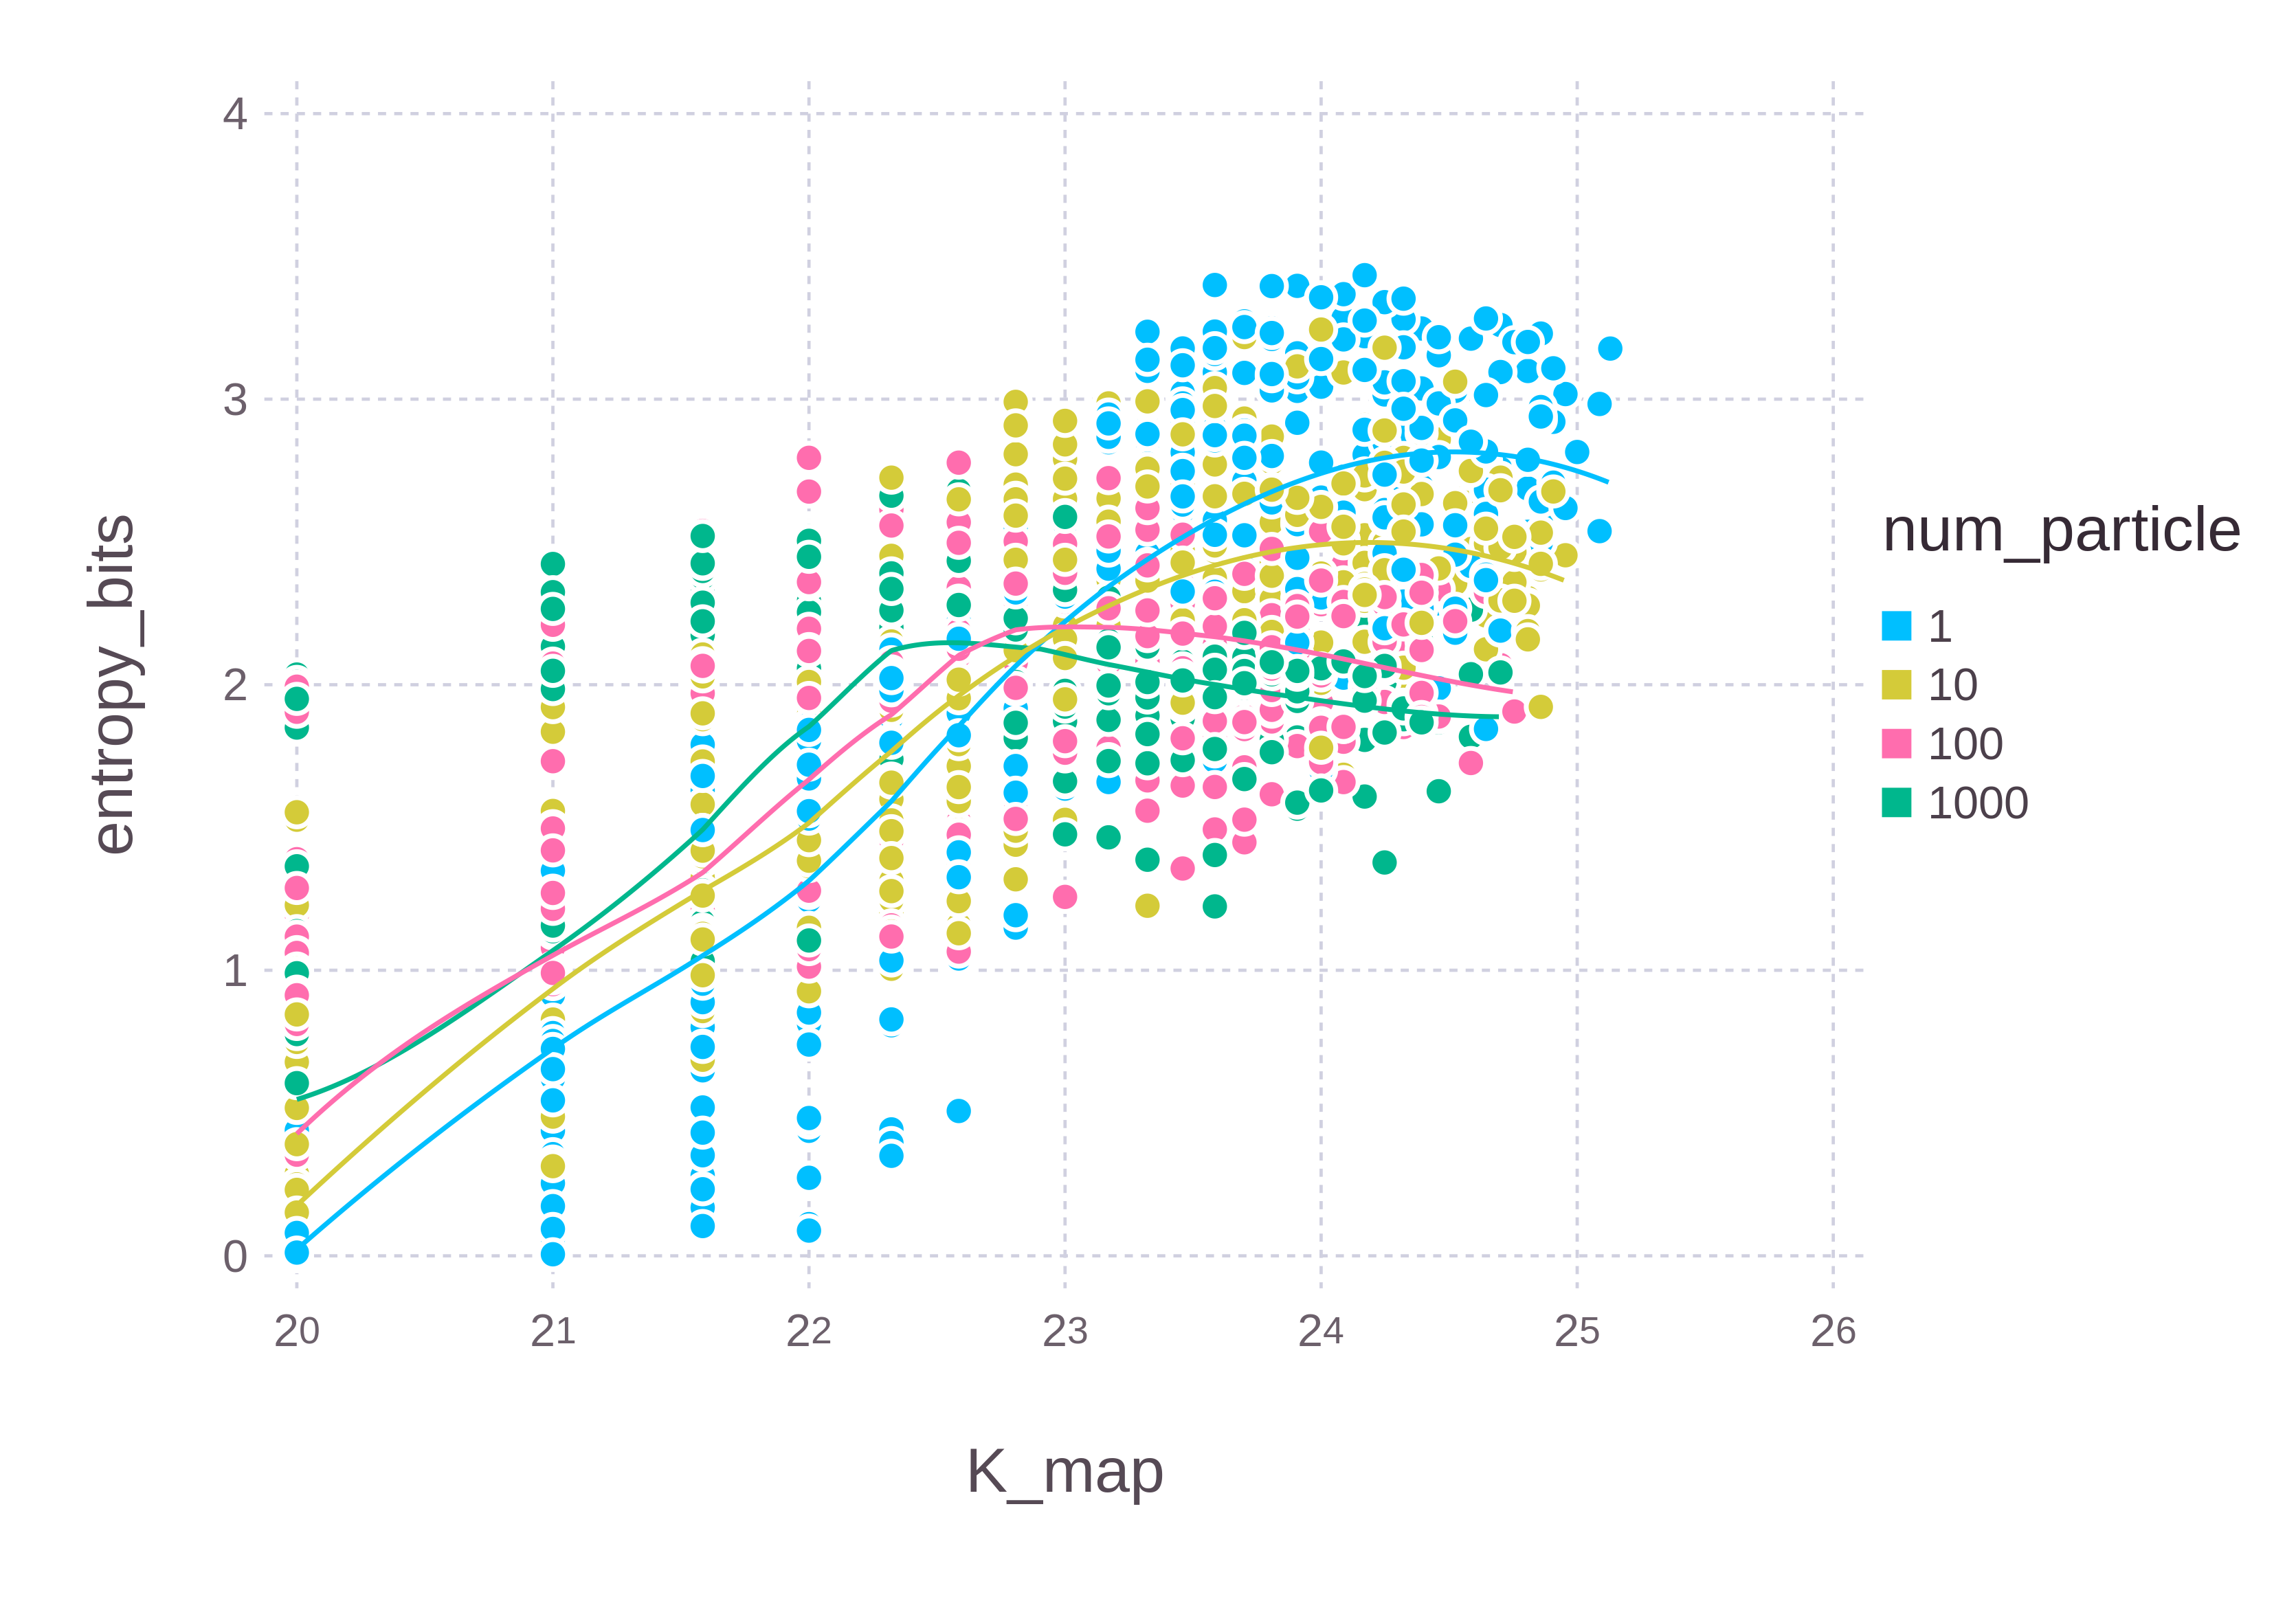

false

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] #discrete_color#56(::Void, ::Void, ::Bool, ::Function) at ./deprecated.jl:57
 [3] discrete_color() at ./deprecated.jl:57
 [4] include_string(::Module, ::String, ::String) at /home/dave/.julia/v0.6/Compat/src/Compat.jl:88
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/dave/.julia/v0.6/IJulia/src/execute_request.jl:180
 [6] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/dave/.julia/v0.6/Compat/src/Compat.jl:332
 [7] eventloop(::ZMQ.Socket) at /home/dave/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##15#18)() at ./task.jl:335
while loading In[174], in expression starting on line 1


In [174]:
plot(run4_ex_res, x=:K_map, y=:entropy_bits, color=:num_particle, Geom.smooth(), Geom.point(),
     Scale.discrete_color(), Scale.x_log2()) |>
    drawpng600

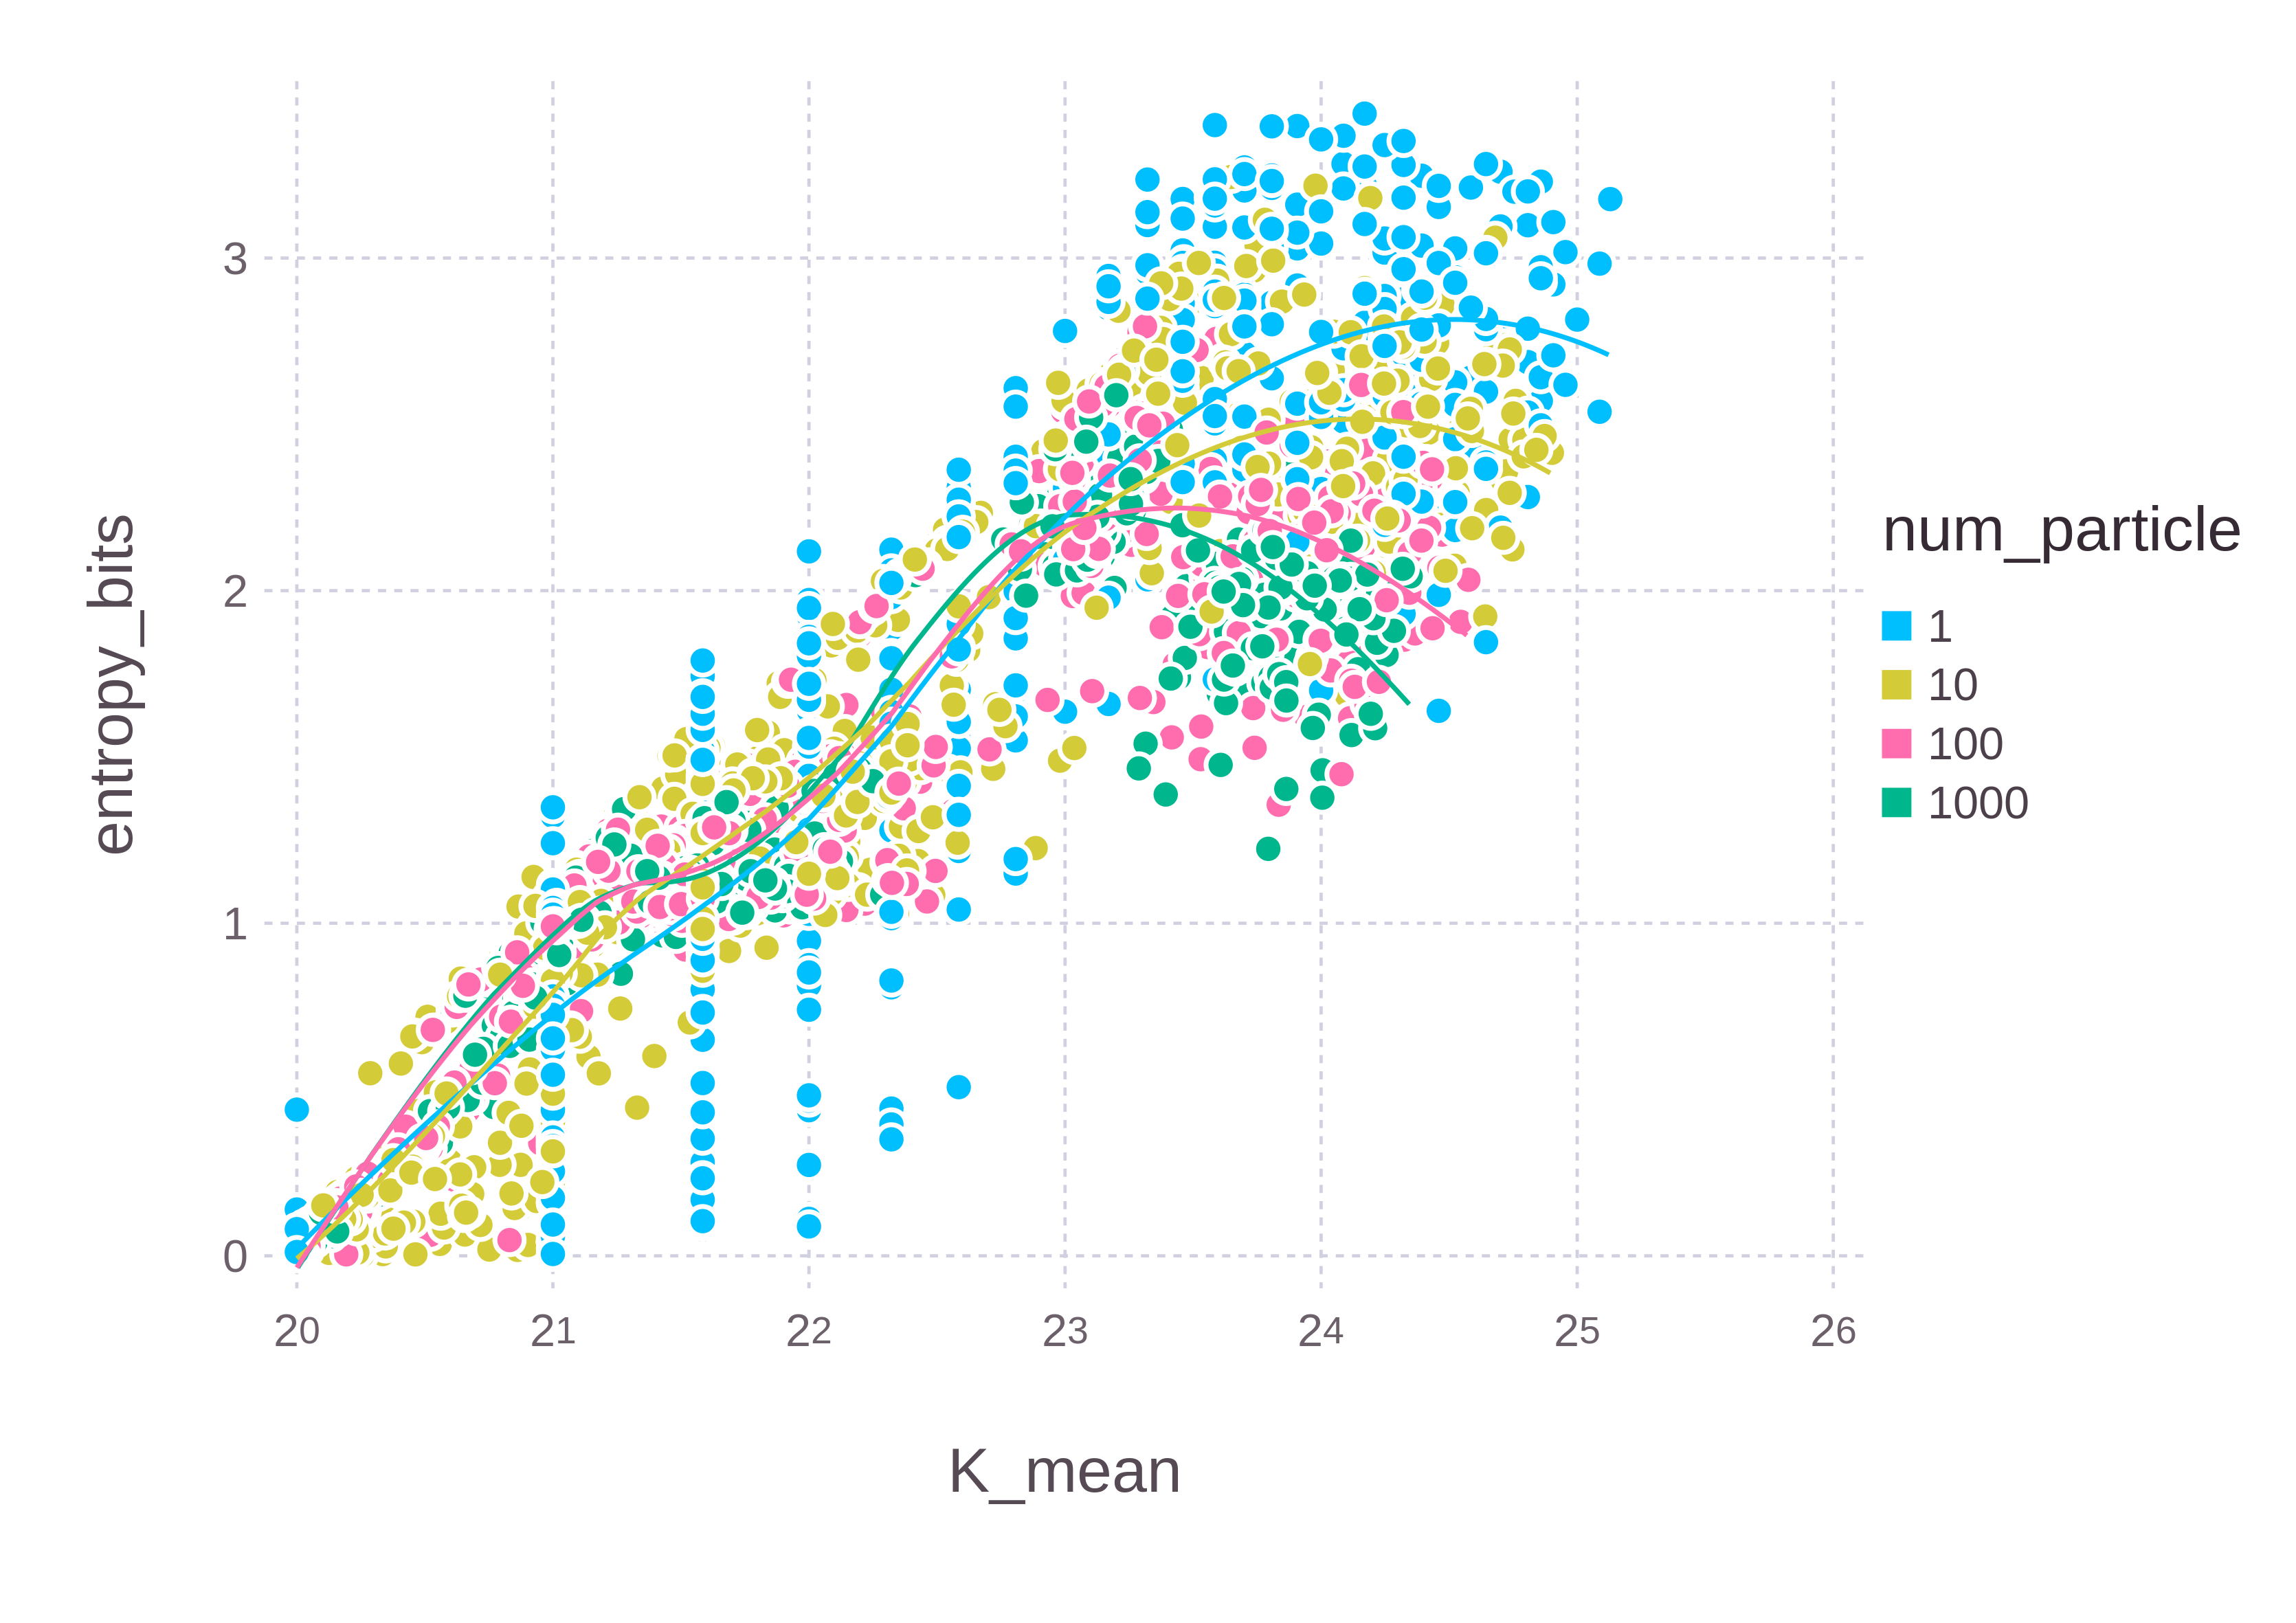

false

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] #discrete_color#56(::Void, ::Void, ::Bool, ::Function) at ./deprecated.jl:57
 [3] discrete_color() at ./deprecated.jl:57
 [4] include_string(::Module, ::String, ::String) at /home/dave/.julia/v0.6/Compat/src/Compat.jl:88
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/dave/.julia/v0.6/IJulia/src/execute_request.jl:180
 [6] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/dave/.julia/v0.6/Compat/src/Compat.jl:332
 [7] eventloop(::ZMQ.Socket) at /home/dave/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##15#18)() at ./task.jl:335
while loading In[175], in expression starting on line 1


In [175]:
plot(run4_ex_res, x=:K_mean, y=:entropy_bits, color=:num_particle, Geom.smooth(), Geom.point(),
     Scale.discrete_color(), Scale.x_log2(), Coord.cartesian(ymin=0)) |>
    drawpng600

# Conclusion

## Learning clusters from data

Can **approximate** Bayesian inferece **online** with **finite resources**

Bridge between **computational** and **algorithmic** models of language acquisition.

## Mapping clusters to categories

Interpretation of output is **tricky**

Inference leads to **uncertainty** about number of clusters

To be useful they have to make contact with _categories_ (lexical etc.).

**Joint inference** can help (context provides information)